<h2 style="text-align:center;font-weight:bold">Machine Learning for Business CA1</h2>

<h2 style="text-align:center;font-weight:bold">-Exploring Clustering Techniques in Credit Card Fraud Segment-</h2>

### TEAM:

* Otawio Chaves Cardoso: 2022200

* Salatiel Marcelino Camilo de Souza: 2022167

* Gabriel Ostroski de Souza: 2022348

* Bárbara Azevedo Pereira: 2022310

### Lecturers:

Dr. Muhammad Iqbal

### Module:

Machine Learning for Business

<h2 style="text-align:center;font-weight:bold">Clustering Algorithms</h2>

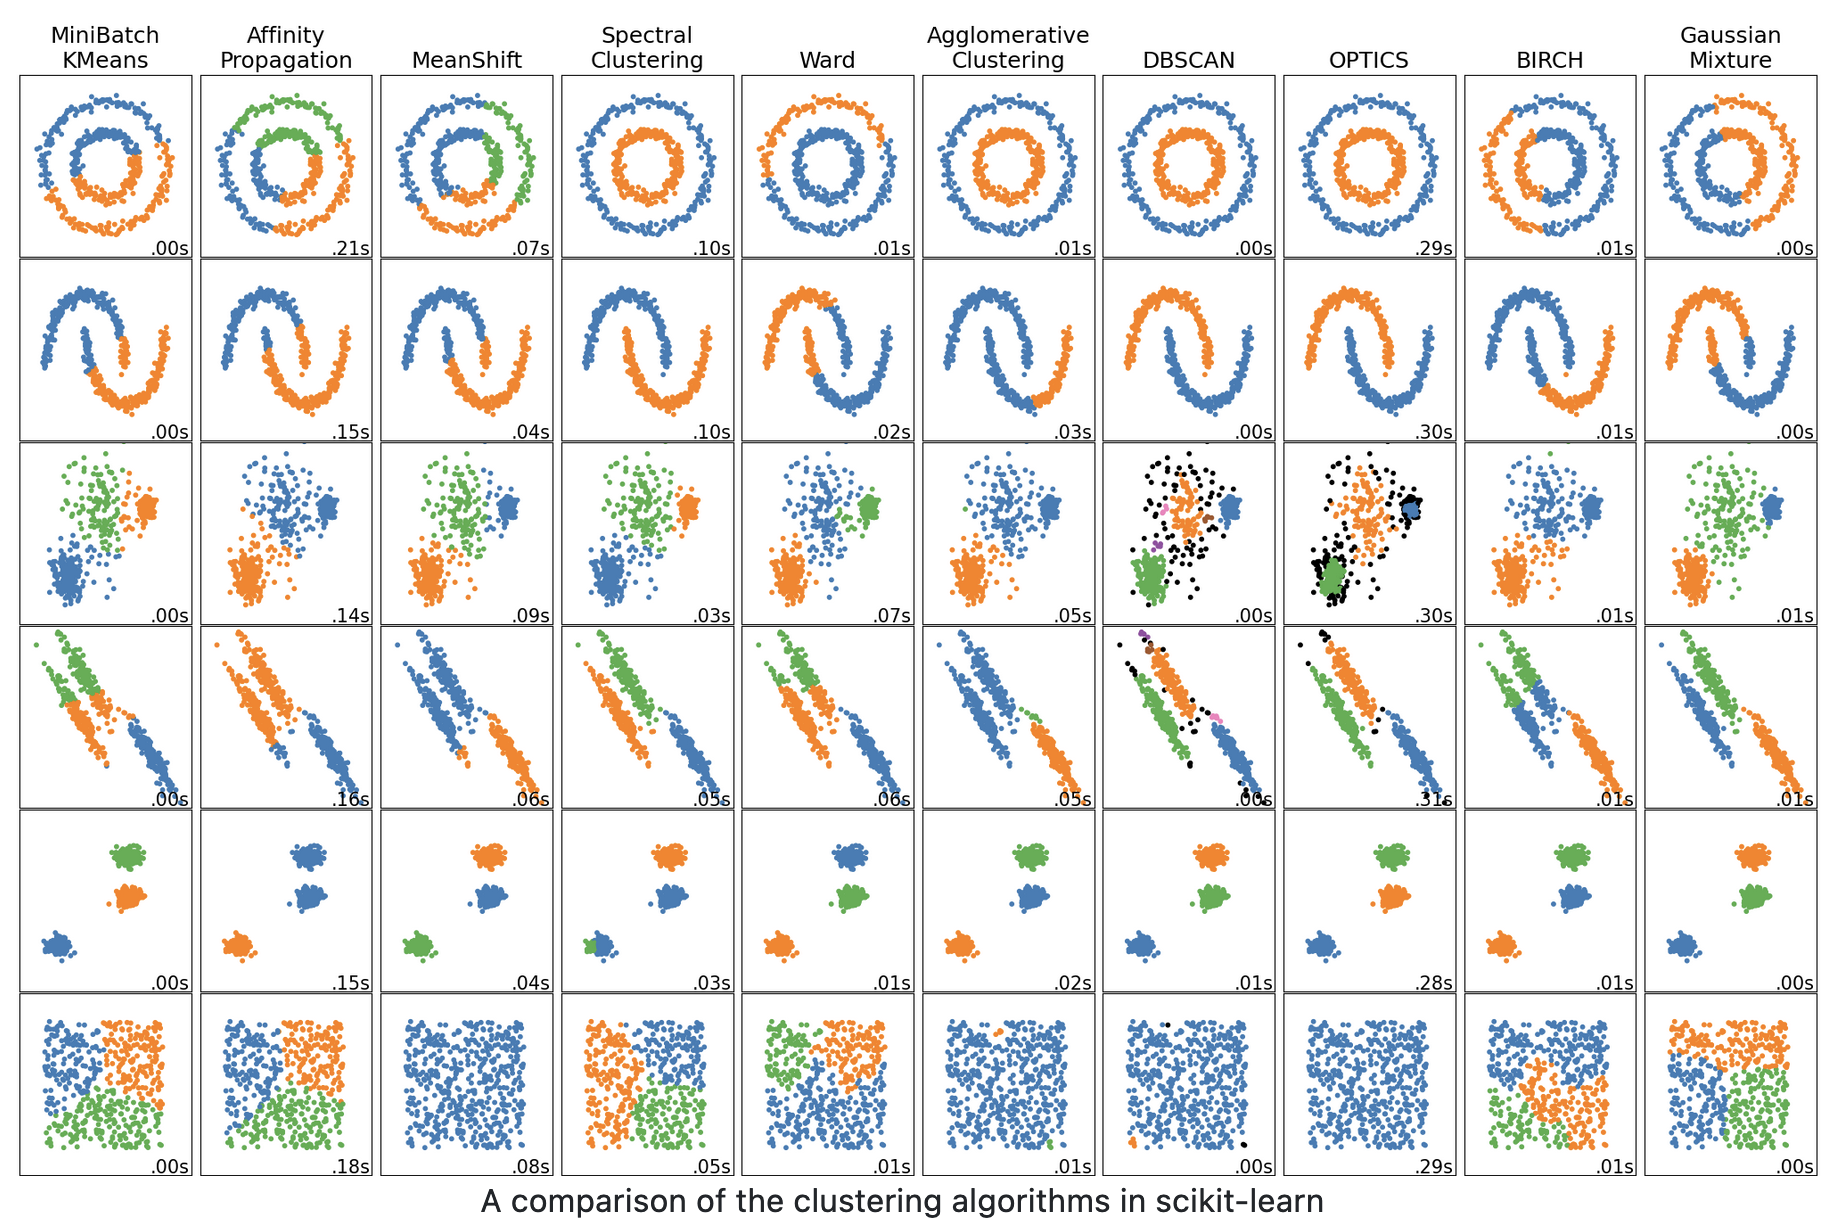

2.3. Clustering — scikit-learn 0.20.3 documentation

# 

<h2 style="text-align:center;font-weight:bold">Understanding of Data</h2>

### Libraries

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package.
import numpy as np
import pandas as pd

# Imputer KNN and  Nearest Neighbors.
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors

# Scaler package.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

# PCA packege.
from sklearn.decomposition import PCA

# Data visualisations package.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from yellowbrick.cluster import SilhouetteVisualizer

# Sklearn Models packege.
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Algorithms Hierarchical.
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Sklearn and Scipy Hyper-Parameter.
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform

# Sklearn metrics package.
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Data visualisation style.
sns.set_palette('bright')
sns.set_style('whitegrid')
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

### Data Dictionary 

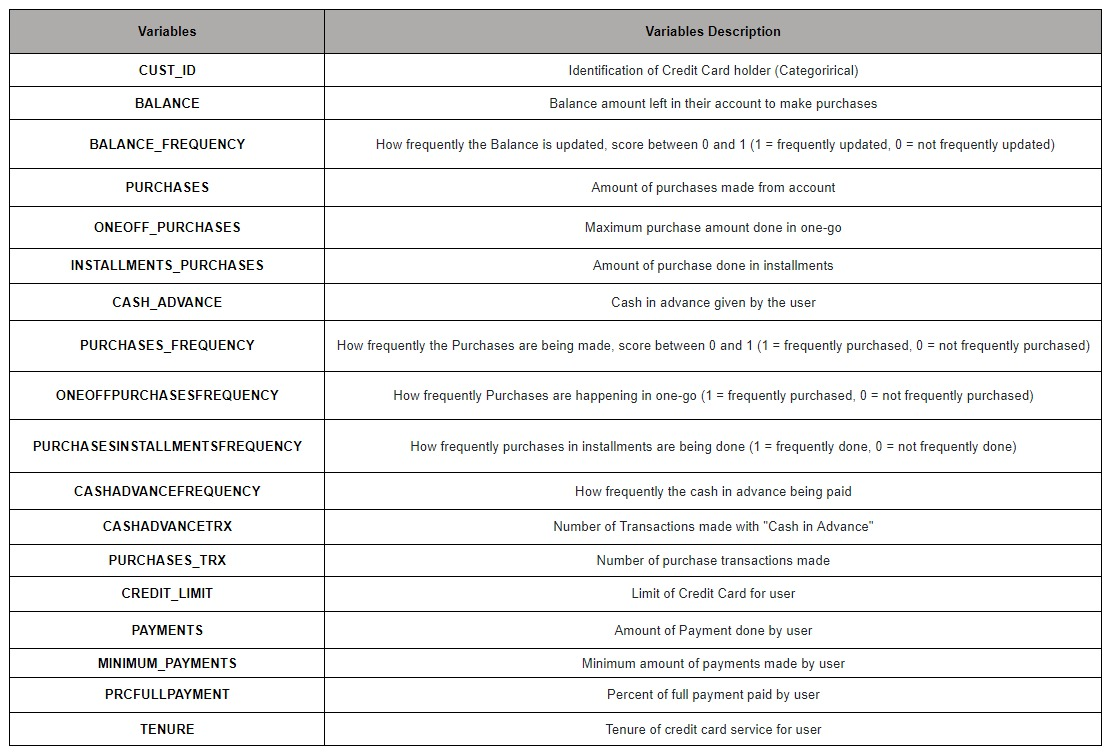

(www.kaggle.com, n.d.)

# 

### Exploratory Data Analysis (EDA)

In [2]:
# Specify missing value formats and read data.
missing_value_formats = ["na", "n.a.", "?", "NA", "n/a", "--"]
df = pd.read_csv("CC GENERAL.csv", na_values=missing_value_formats)

# Check for any missing values.
if df.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

# Display first and last 5 records.
display(df.head())
display(df.tail())

There are missing values in the data.


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [3]:
# Print a message and the column names.
print("Column names:")
print(df.columns)

Column names:
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [4]:
# Rename columns.
new_names = {
    'CUST_ID': 'Customer ID',
    'BALANCE': 'Balance',
    'BALANCE_FREQUENCY': 'Balance Frequency',
    'PURCHASES': 'Purchases',
    'ONEOFF_PURCHASES': 'One Off Purchases',
    'INSTALLMENTS_PURCHASES': 'Installments Purchases',
    'CASH_ADVANCE': 'Cash Advance',
    'PURCHASES_FREQUENCY': 'Purchases Frequency',
    'ONEOFF_PURCHASES_FREQUENCY': 'One Off Purchases Frequency',
    'PURCHASES_INSTALLMENTS_FREQUENCY': 'Installments Purchases Frequency',
    'CASH_ADVANCE_FREQUENCY': 'Cash Advance Frequency',
    'CASH_ADVANCE_TRX': 'Cash Advance TRX',
    'PURCHASES_TRX': 'Purchases TRX',
    'CREDIT_LIMIT': 'Credit Limit',
    'PAYMENTS': 'Payments',
    'MINIMUM_PAYMENTS': 'Minimum Payments',
    'PRC_FULL_PAYMENT': 'Percent Full Payment',
    'TENURE': 'Tenure'
}

df = df.rename(columns=new_names)

In [5]:
# Print the new columns names.
print("Column names:")
print(df.columns)

Column names:
Index(['Customer ID', 'Balance', 'Balance Frequency', 'Purchases',
       'One Off Purchases', 'Installments Purchases', 'Cash Advance',
       'Purchases Frequency', 'One Off Purchases Frequency',
       'Installments Purchases Frequency', 'Cash Advance Frequency',
       'Cash Advance TRX', 'Purchases TRX', 'Credit Limit', 'Payments',
       'Minimum Payments', 'Percent Full Payment', 'Tenure'],
      dtype='object')


In [6]:
# Use the info() method to display data types and null values.
print("Summary information about the dataset:")
print("---------------------------------------")
df.info(verbose=True, null_counts=True)

# Shape of the DataFrame.
print("\nShape of the dataset:")
print(df.shape)

# Add a blank line for readability.
print("")

Summary information about the dataset:
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer ID                       8950 non-null   object 
 1   Balance                           8950 non-null   float64
 2   Balance Frequency                 8950 non-null   float64
 3   Purchases                         8950 non-null   float64
 4   One Off Purchases                 8950 non-null   float64
 5   Installments Purchases            8950 non-null   float64
 6   Cash Advance                      8950 non-null   float64
 7   Purchases Frequency               8950 non-null   float64
 8   One Off Purchases Frequency       8950 non-null   float64
 9   Installments Purchases Frequency  8950 non-null   float64
 10  Cash Advance Frequency            8950 non-null   flo

In [7]:
# Check for duplicate rows.
duplicate_rows = df[df.duplicated()]

# Print number of duplicate rows.
print("Number of duplicate rows: ", duplicate_rows.shape[0])

# Remove duplicate rows.
df.drop_duplicates(inplace=True)

# Print number of rows after removing duplicates.
print("Number of rows after removing duplicates: ", df.shape[0])

Number of duplicate rows:  0
Number of rows after removing duplicates:  8950


# 

### Checking for missing values

In [8]:
# Check for null values.
null_values = df.isnull().sum().sort_values()

# Print the number and percentage of null values.
print("Null values per column:")
print(null_values)
print("\nPercentage of null values per column:")
print(df.isnull().sum()*100/df.shape[0])

Null values per column:
Customer ID                           0
Payments                              0
Purchases TRX                         0
Cash Advance TRX                      0
Cash Advance Frequency                0
Installments Purchases Frequency      0
Percent Full Payment                  0
One Off Purchases Frequency           0
Cash Advance                          0
Installments Purchases                0
One Off Purchases                     0
Purchases                             0
Balance Frequency                     0
Balance                               0
Purchases Frequency                   0
Tenure                                0
Credit Limit                          1
Minimum Payments                    313
dtype: int64

Percentage of null values per column:
Customer ID                         0.000000
Balance                             0.000000
Balance Frequency                   0.000000
Purchases                           0.000000
One Off Purchases       

###  Replacing missing values

In [9]:
# Remove one rows with missing values in 'Credit Limit'.
df = df.dropna(subset=['Credit Limit'])

# KNN imputer with k=3.
imputer = KNNImputer(n_neighbors=3)

# Impute missing values in the 'Minimum Payments' column.
df['Minimum Payments'] = imputer.fit_transform(df[['Minimum Payments']])

# Check for any remaining missing values.
if df.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

# Print the shape of the DataFrame.
print("\nNew shape of the dataset:")
print(df.shape)

No missing values.

New shape of the dataset:
(8949, 18)


# 

### Descriptive Statistics 

In [10]:
# Viewing some statistical information.
df.describe().T.round(4)

count       mean        std      min  \
Balance                           8949.0  1564.6476  2081.5840   0.0000   
Balance Frequency                 8949.0     0.8774     0.2368   0.0000   
Purchases                         8949.0  1003.3169  2136.7278   0.0000   
One Off Purchases                 8949.0   592.5036  1659.9689   0.0000   
Installments Purchases            8949.0   411.1136   904.3782   0.0000   
Cash Advance                      8949.0   978.9596  2097.2643   0.0000   
Purchases Frequency               8949.0     0.4904     0.4014   0.0000   
One Off Purchases Frequency       8949.0     0.2025     0.2983   0.0000   
Installments Purchases Frequency  8949.0     0.3645     0.3975   0.0000   
Cash Advance Frequency            8949.0     0.1351     0.2001   0.0000   
Cash Advance TRX                  8949.0     3.2491     6.8250   0.0000   
Purchases TRX                     8949.0    14.7115    24.8586   0.0000   
Credit Limit                      8949.0  4494.4495  3638.8157  50.0000   
Payments                          8949.0  1733.3365  2895.1681   0.0000   
Minimum Payments                  8949.0   864.3049  2330.7009   0.0192   
Percent Full Payment              8949.0     0.1537     0.2925   0.0000   
Tenure                            8949.0    11.5179     1.3371   6.0000   

                                        25%        50%        75%         max  
Balance                            128.3658   873.6803  2054.3728  19043.1386  
Balance Frequency                    0.8889     1.0000     1.0000      1.0000  
Purchases                           39.8000   361.4900  1110.1700  49039.5700  
One Off Purchases                    0.0000    38.0000   577.8300  40761.2500  
Installments Purchases               0.0000    89.0000   468.6500  22500.0000  
Cash Advance                         0.0000     0.0000  1113.8687  47137.2118  
Purchases Frequency                  0.0833     0.5000     0.9167      1.0000  
One Off Purchases Frequency          0.0000     0.0833     0.3000      1.0000  
Installments Purchases Frequency     0.0000     0.1667     0.7500      1.0000  
Cash Advance Frequency               0.0000     0.0000     0.2222      1.5000  
Cash Advance TRX                     0.0000     0.0000     4.0000    123.0000  
Purchases TRX                        1.0000     7.0000    17.0000    358.0000  
Credit Limit                      1600.0000  3000.0000  6500.0000  30000.0000  
Payments                           383.2828   857.0627  1901.2793  50721.4834  
Minimum Payments                   170.8756   335.6576   864.3049  76406.2075  
Percent Full Payment                 0.0000     0.0000     0.1429      1.0000  
Tenure                              12.0000    12.0000    12.0000     12.0000

In [11]:
# Viewing some statistical information.
df.describe(include='object').T

count unique     top freq
Customer ID  8949   8949  C19183    1

# 

### Index Setting

In [12]:
# Set the "ID" column as the index.
df = df.set_index('Customer ID')

# Display first and last 5 records.
display(df.head())
display(df.tail())

Balance  Balance Frequency  Purchases  One Off Purchases  \
Customer ID                                                                 
C10001         40.900749           0.818182      95.40               0.00   
C10002       3202.467416           0.909091       0.00               0.00   
C10003       2495.148862           1.000000     773.17             773.17   
C10004       1666.670542           0.636364    1499.00            1499.00   
C10005        817.714335           1.000000      16.00              16.00   

             Installments Purchases  Cash Advance  Purchases Frequency  \
Customer ID                                                              
C10001                         95.4      0.000000             0.166667   
C10002                          0.0   6442.945483             0.000000   
C10003                          0.0      0.000000             1.000000   
C10004                          0.0    205.788017             0.083333   
C10005                          0.0      0.000000             0.083333   

             One Off Purchases Frequency  Installments Purchases Frequency  \
Customer ID                                                                  
C10001                          0.000000                          0.083333   
C10002                          0.000000                          0.000000   
C10003                          1.000000                          0.000000   
C10004                          0.083333                          0.000000   
C10005                          0.083333                          0.000000   

             Cash Advance Frequency  Cash Advance TRX  Purchases TRX  \
Customer ID                                                            
C10001                     0.000000                 0              2   
C10002                     0.250000                 4              0   
C10003                     0.000000                 0             12   
C10004                     0.083333                 1              1   
C10005                     0.000000                 0              1   

             Credit Limit     Payments  Minimum Payments  \
Customer ID                                                
C10001             1000.0   201.802084        139.509787   
C10002             7000.0  4103.032597       1072.340217   
C10003             7500.0   622.066742        627.284787   
C10004             7500.0     0.000000        864.304943   
C10005             1200.0   678.334763        244.791237   

             Percent Full Payment  Tenure  
Customer ID                                
C10001                   0.000000      12  
C10002                   0.222222      12  
C10003                   0.000000      12  
C10004                   0.000000      12  
C10005                   0.000000      12

Balance  Balance Frequency  Purchases  One Off Purchases  \
Customer ID                                                                
C19186        28.493517           1.000000     291.12               0.00   
C19187        19.183215           1.000000     300.00               0.00   
C19188        23.398673           0.833333     144.40               0.00   
C19189        13.457564           0.833333       0.00               0.00   
C19190       372.708075           0.666667    1093.25            1093.25   

             Installments Purchases  Cash Advance  Purchases Frequency  \
Customer ID                                                              
C19186                       291.12      0.000000             1.000000   
C19187                       300.00      0.000000             1.000000   
C19188                       144.40      0.000000             0.833333   
C19189                         0.00     36.558778             0.000000   
C19190                         0.00    127.040008             0.666667   

             One Off Purchases Frequency  Installments Purchases Frequency  \
Customer ID                                                                  
C19186                          0.000000                          0.833333   
C19187                          0.000000                          0.833333   
C19188                          0.000000                          0.666667   
C19189                          0.000000                          0.000000   
C19190                          0.666667                          0.000000   

             Cash Advance Frequency  Cash Advance TRX  Purchases TRX  \
Customer ID                                                            
C19186                     0.000000                 0              6   
C19187                     0.000000                 0              6   
C19188                     0.000000                 0              5   
C19189                     0.166667                 2              0   
C19190                     0.333333                 2             23   

             Credit Limit    Payments  Minimum Payments  Percent Full Payment  \
Customer ID                                                                     
C19186             1000.0  325.594462         48.886365                  0.50   
C19187             1000.0  275.861322        864.304943                  0.00   
C19188             1000.0   81.270775         82.418369                  0.25   
C19189              500.0   52.549959         55.755628                  0.25   
C19190             1200.0   63.165404         88.288956                  0.00   

             Tenure  
Customer ID          
C19186            6  
C19187            6  
C19188            6  
C19189            6  
C19190            6

# 

### Data visualization 

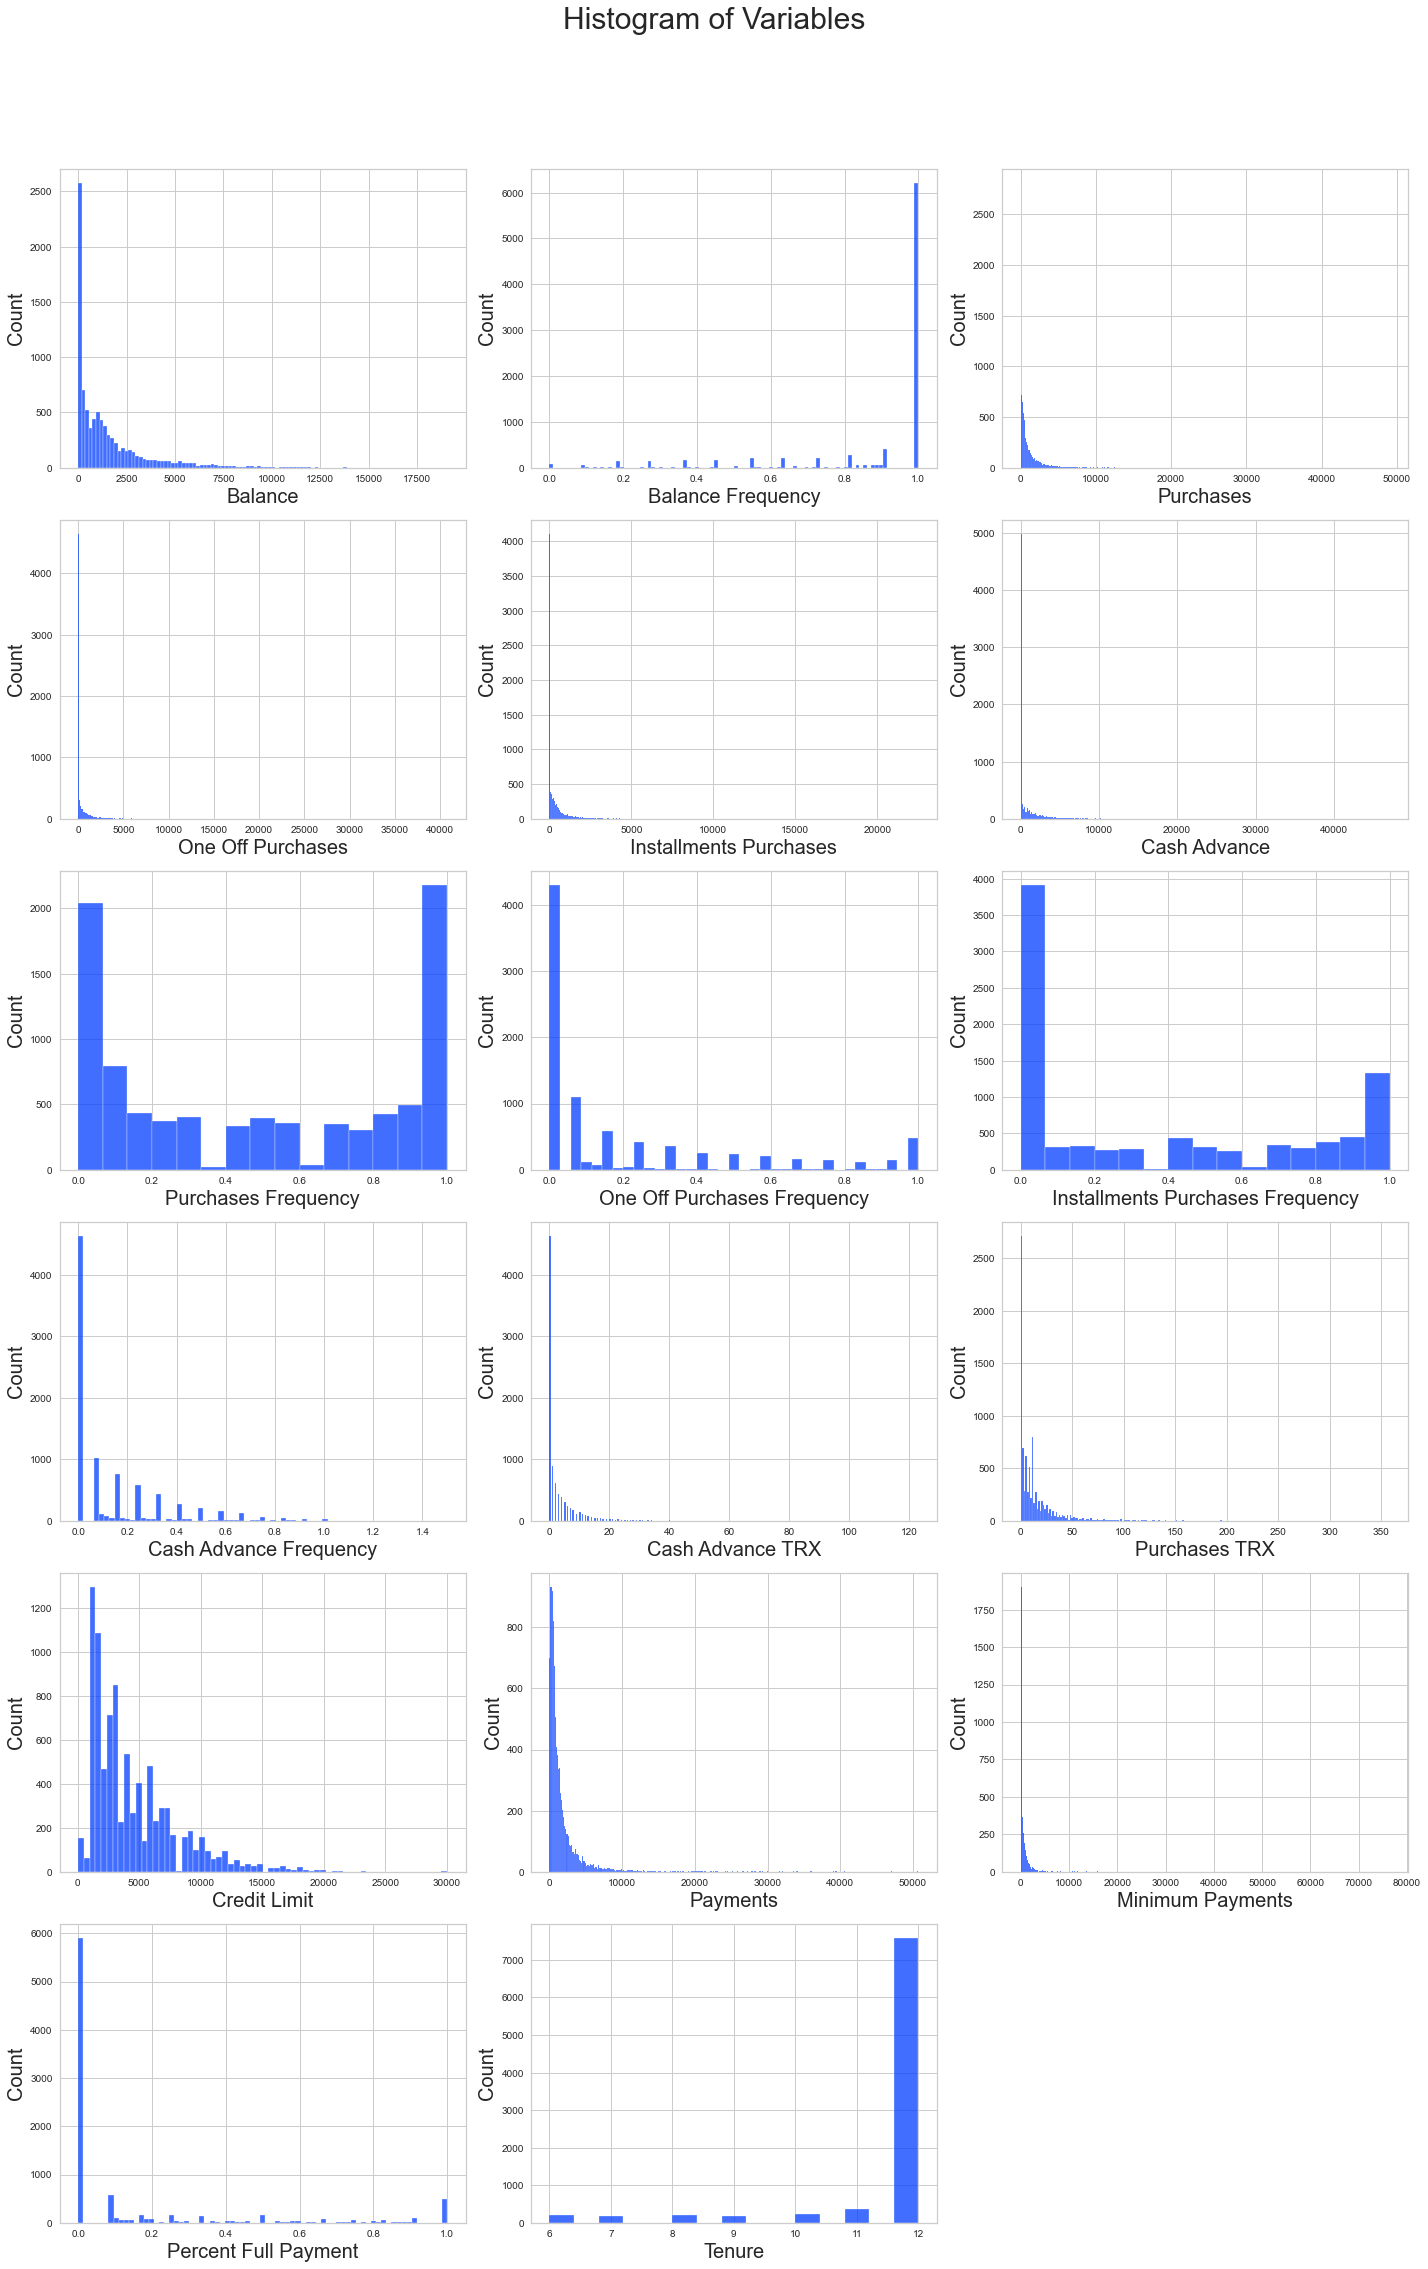

In [13]:
# Select variables for the histogram plot.
variables = ['Balance', 'Balance Frequency', 'Purchases', 'One Off Purchases', 'Installments Purchases', 
             'Cash Advance', 'Purchases Frequency', 'One Off Purchases Frequency', 'Installments Purchases Frequency', 
             'Cash Advance Frequency', 'Cash Advance TRX', 'Purchases TRX', 'Credit Limit', 'Payments', 
             'Minimum Payments', 'Percent Full Payment', 'Tenure']

# Create figure.
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
axs = axs.flatten() # Flatten axes.
plt.suptitle('Histogram of Variables', fontsize=30, y=1.05) #Title

# Loop variables and plot histogram.
for i, var in enumerate(variables):
    sns.histplot(df[var].dropna(), ax=axs[i], kde=False)
    axs[i].set_xlabel(var, fontsize=20)
    axs[i].set_ylabel('Count', fontsize=20)

# Check if there are any remaining axes and remove them.
if i < len(axs) - 1:
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

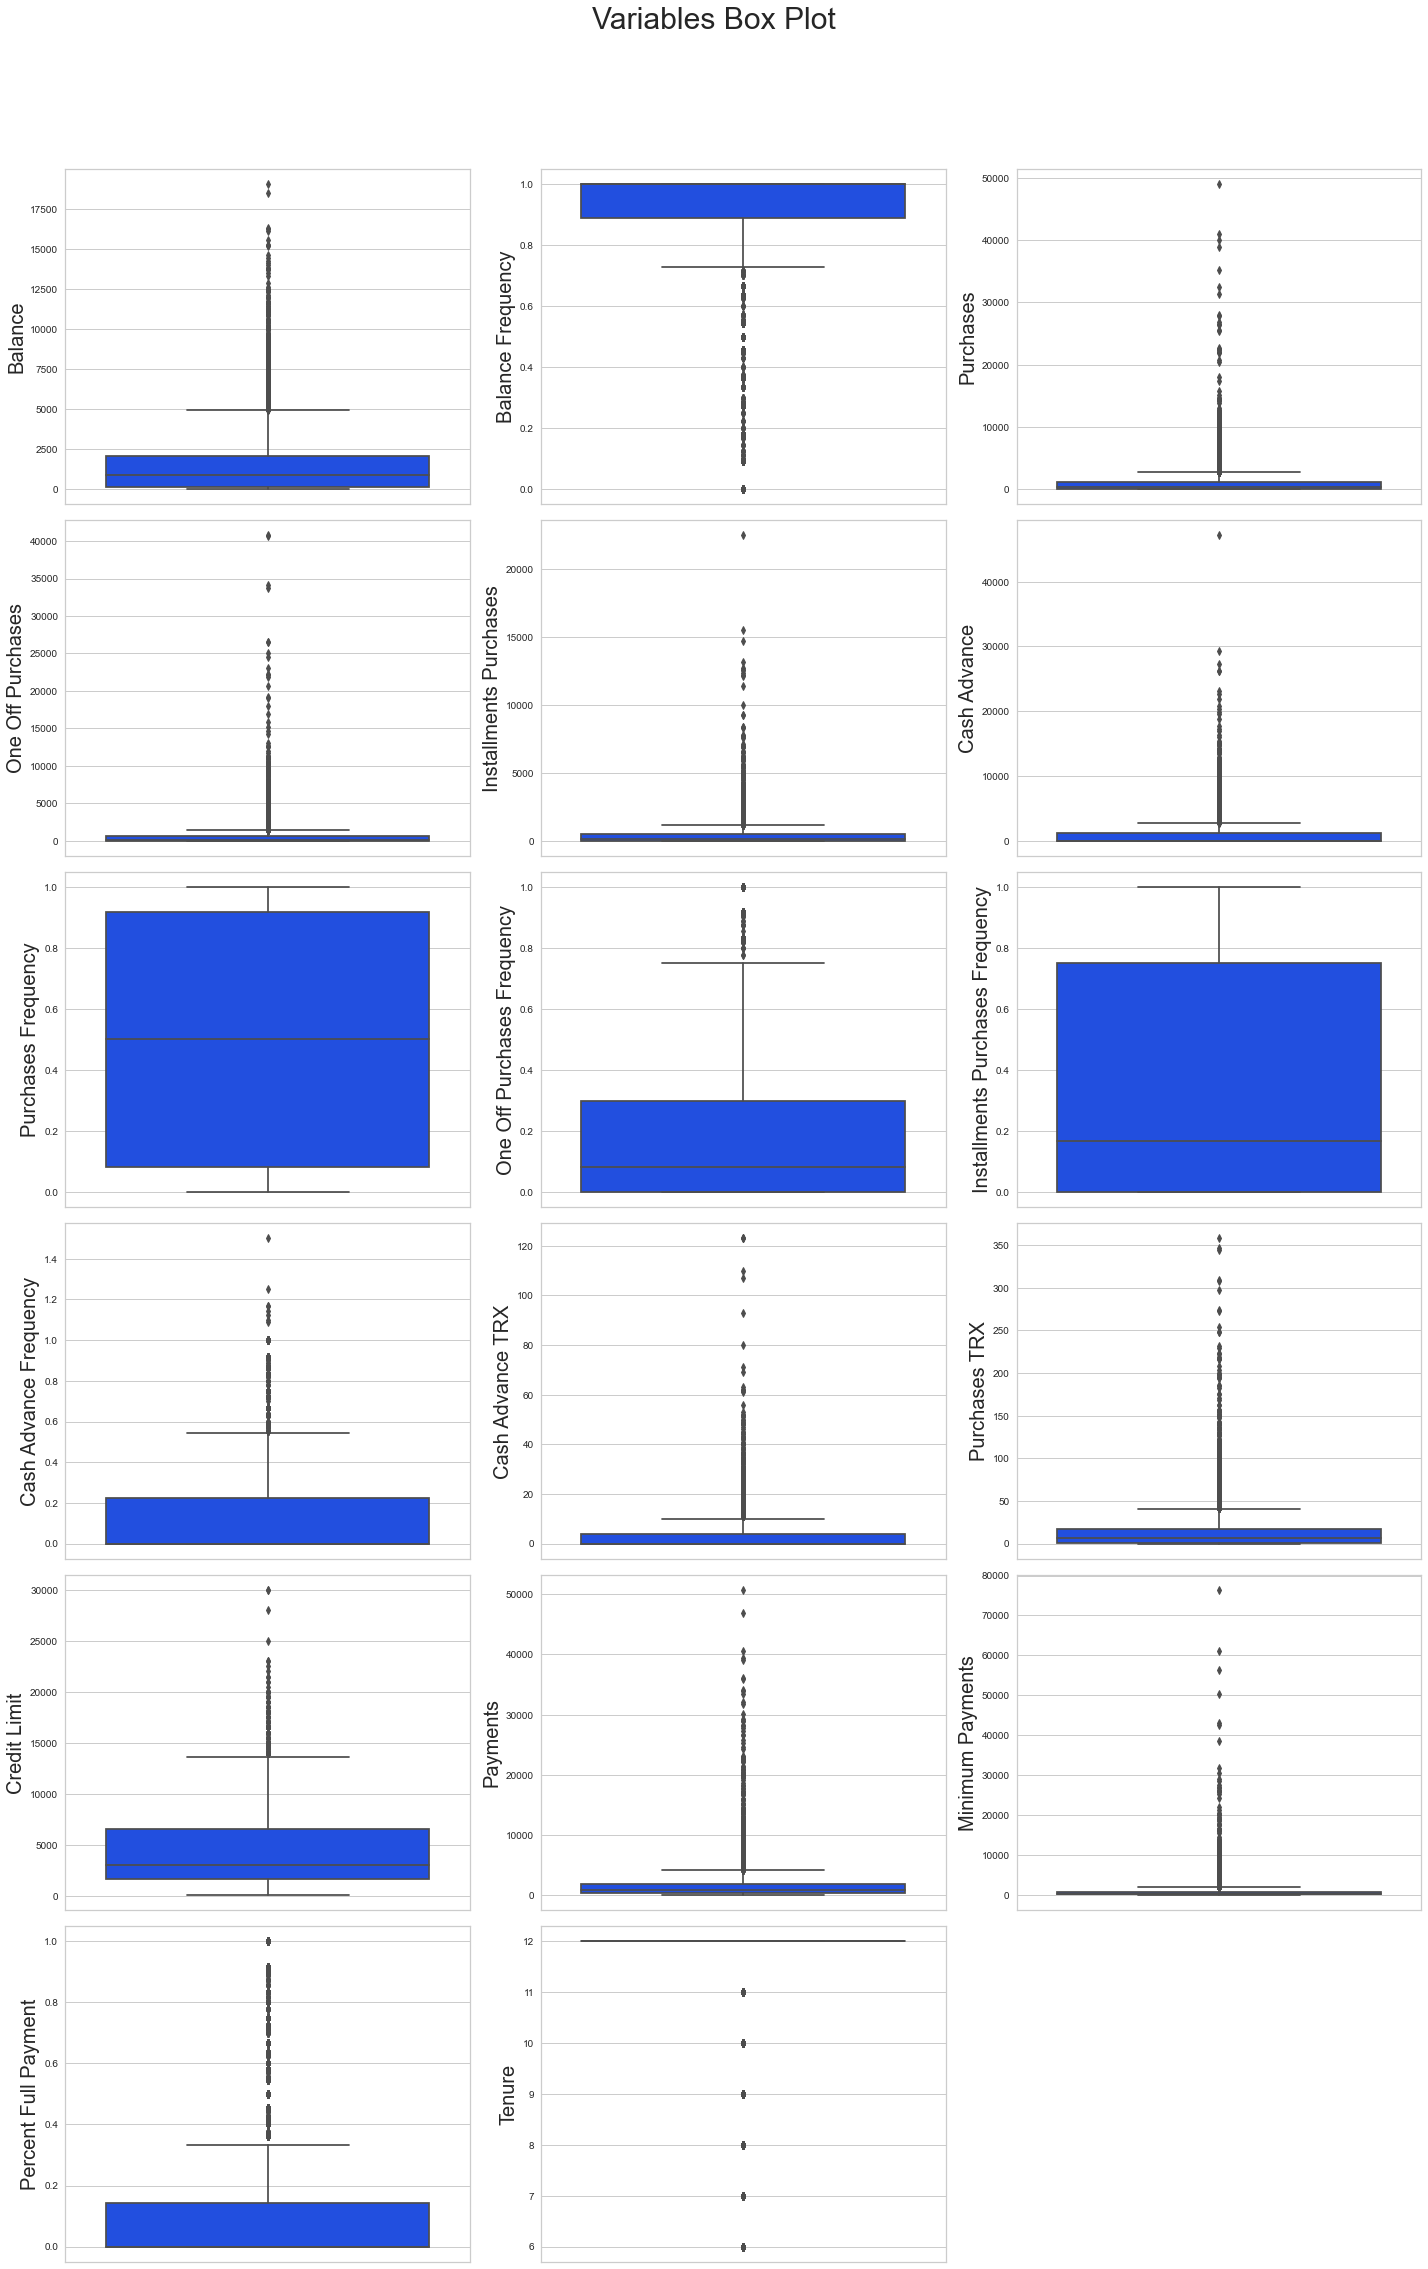

In [14]:
# Create figure.
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
axs = axs.flatten() # Flatten axes.
plt.suptitle('Variables Box Plot', fontsize=30, y=1.05) #Title.

# Loop variables and plot boxplot.
for i, var in enumerate(variables):
    sns.boxplot(y=df[var].dropna(), ax=axs[i])
    axs[i].set_ylabel(var, fontsize=20)
    
# Check if there are any axes and remove them.
if i < len(axs) - 1:
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# 

### Correlation

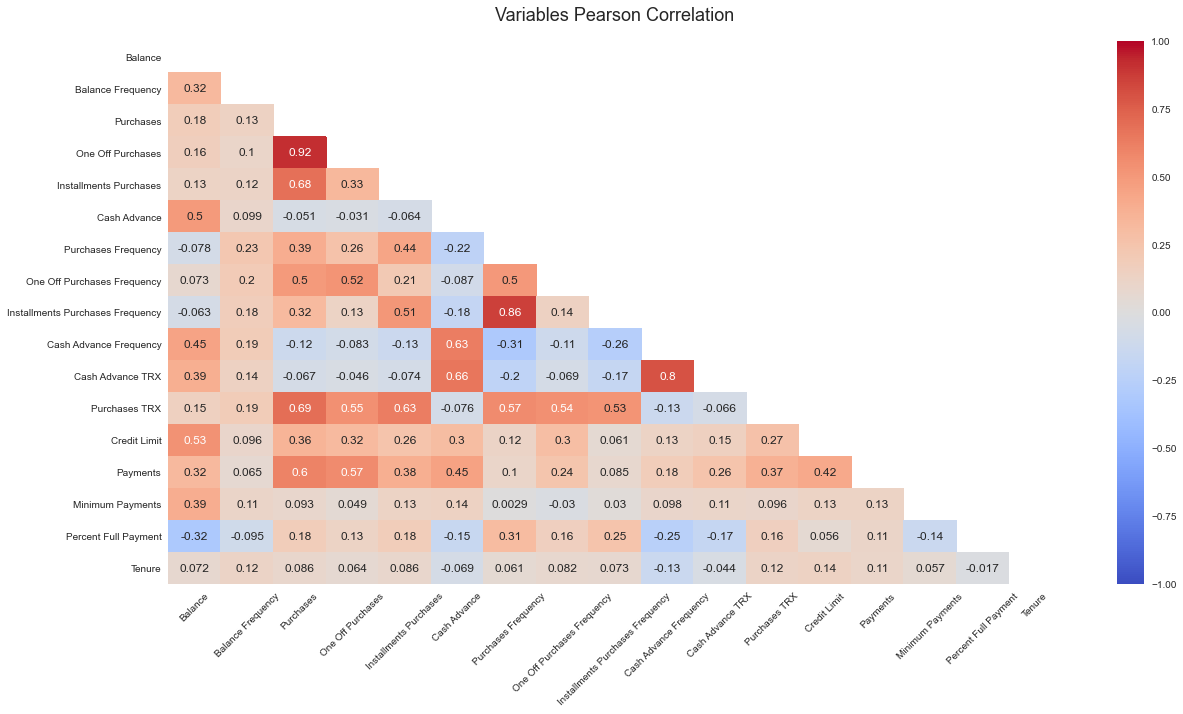

In [15]:
# Correlation of numerical variables.
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df.corr(method="pearson"), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Variables Pearson Correlation', fontdict={'fontsize':18}, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# 

### Outliers

In [16]:
def count_outliers(df):
    # Calculate the interquartile range (IQR).
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    
    # Define the threshold for outliers.
    threshold = 1.5 * iqr
    
    # Count the number of outliers for each variable.
    outliers = pd.DataFrame()
    for col in df.columns:
        lower = q1[col] - threshold[col]
        upper = q3[col] + threshold[col]
        count = len(df[(df[col] < lower) | (df[col] > upper)])
        percentage = round(100 * count / len(df), 2)
        outliers[col] = [count, percentage]
    
    # Sort the DataFrame by ascending outlier count.
    outliers = outliers.T.sort_values(by=0)
    outliers.columns = ['Outliers', 'Percentage']
    
    return outliers

In [17]:
outliers = count_outliers(df)
print(outliers)

                                  Outliers  Percentage
Installments Purchases Frequency       0.0        0.00
Purchases Frequency                    0.0        0.00
Credit Limit                         248.0        2.77
Cash Advance Frequency               525.0        5.87
Balance                              695.0        7.77
Purchases TRX                        766.0        8.56
Minimum Payments                     774.0        8.65
One Off Purchases Frequency          782.0        8.74
Cash Advance TRX                     804.0        8.98
Purchases                            808.0        9.03
Payments                             808.0        9.03
Installments Purchases               867.0        9.69
One Off Purchases                   1013.0       11.32
Cash Advance                        1030.0       11.51
Tenure                              1365.0       15.25
Percent Full Payment                1474.0       16.47
Balance Frequency                   1492.0       16.67


###  Replacing Outliers

In [18]:
# Calculate the interquartile range (IQR) for each variable
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Define the threshold for outliers.
threshold = 1.5 * iqr

# Set outliers to NaN.
for col in df.columns:
    lower = q1[col] - threshold[col]
    upper = q3[col] + threshold[col]
    df.loc[(df[col] < lower) | (df[col] > upper), col] = np.nan

# Impute missing values using KNN.
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 

### Checking the sparsity

In [19]:
def sparsity_density(df):
    non_zero = np.count_nonzero(df)
    total_val = np.product(df.shape)
    sparsity = (total_val - non_zero) / total_val
    density = non_zero / total_val
    
    print("Density:  ", density)
    print("Sparsity: ", sparsity)

# Calculating the percentage with the function.
sparsity_density(df) # Confirming if data is sparse.

# Checking if the data is sparse
from scipy import sparse
if sparse.issparse(df):
    print("This dataframe is sparse.")
else:
    print("This dataframe is not sparse.")

Density:   0.7105296023873847
Sparsity:  0.2894703976126153
This dataframe is not sparse.


# 

### Scaler

In [20]:
# Create scaler objects
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
normalizer = Normalizer()

# Scale the data using each scaler
#standard_scaled_data = standard_scaler.fit_transform(data_array.astype(np.float))
#robust_scaled_data = robust_scaler.fit_transform(data_array.astype(np.float))
#minmax_scaled_data = minmax_scaler.fit_transform(data_array.astype(np.float))
df_normalized = normalizer.fit_transform(df.astype(np.float))

# 

### Principal component analysis, or PCA.

Total variance explained by 2 principal components: 0.65
Variance ratio explained by principal component 1: 0.38
Variance ratio explained by principal component 2: 0.27


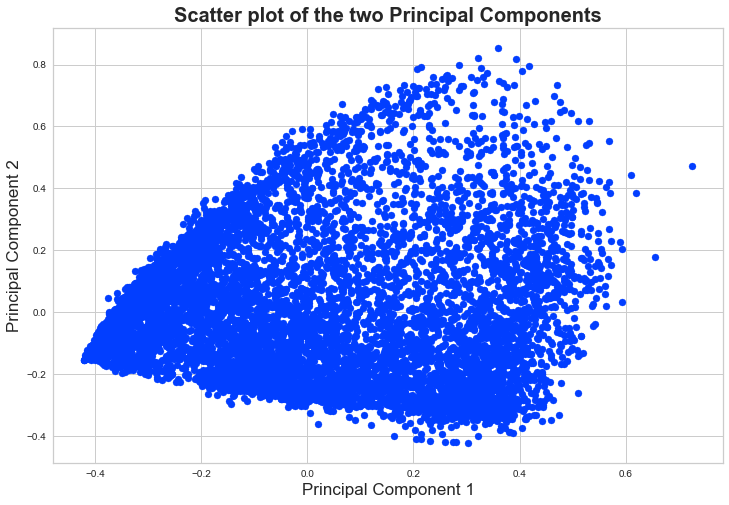

In [21]:
# Apply PCA to the Scaled data.
pca = PCA(n_components=2) # Setting two components to explore clustering techniques.
df_PCA = pca.fit_transform(df_normalized)

# Calculate the variance ratio explained by each principal component.
variance_ratio = pca.explained_variance_ratio_
total_variance = np.sum(variance_ratio)
print(f'Total variance explained by {len(variance_ratio)} principal components: {total_variance:.2f}')

# Optionally, you can also print the variance ratio explained by each principal component
for i, ratio in enumerate(variance_ratio):
    print(f'Variance ratio explained by principal component {i+1}: {ratio:.2f}')
    
# Create a scatter plot of the first two principal components.
plt.figure(figsize=(12, 8))
plt.scatter(df_PCA[:, 0], df_PCA[:, 1])

plt.xlabel('Principal Component 1',fontsize=17)
plt.ylabel('Principal Component 2',fontsize=17)
plt.title('Scatter plot of the two Principal Components',fontsize=20, fontweight='bold', ha='center')
plt.show()

# 

# 

<h2 style="text-align:center;font-weight:bold">K-Means Implementation</h2>

<h2 style="text-align:center;font-weight:bold">-Heuristic Methods-</h2>

### Elbow Method 

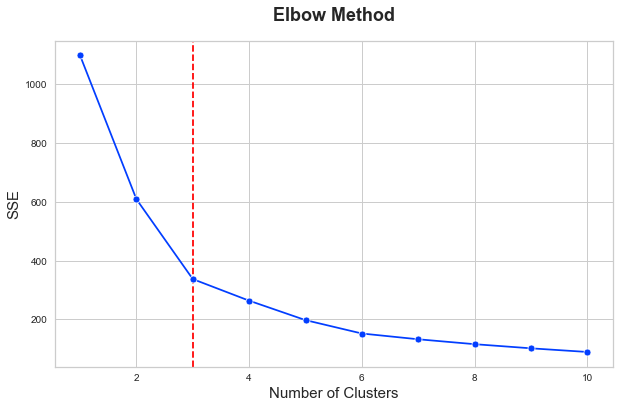


Seems Like Customers can be grouped to 3 or 4 Clusters.


In [22]:
# Elbow Method from 1 cluster to 10, using K-Means Model
n_clusters = 10
inertias = []

for n_cluster in range(1 , n_clusters+1):
    kmean= KMeans(n_cluster, random_state=0)
    kmean.fit(df_PCA)
    inertias.append(kmean.inertia_)
    
plt.figure(figsize=(10, 6))
plt.axvline(x=3, color='red', linestyle='--')
sns.lineplot(range(1 , n_clusters+1), inertias, marker='o')
plt.xlabel("Number of Clusters", fontsize=15)
plt.ylabel("SSE", fontsize=15)
plt.title("Elbow Method", fontsize=18, pad=20, fontweight='bold')
plt.show()

print("\nSeems Like Customers can be grouped to 3 or 4 Clusters.")

### Silhouette Score

Silhouette Scores:

Silhouette Score(n = 2): 0.4349
Silhouette Score(n = 3): 0.4827
Silhouette Score(n = 4): 0.4217
Silhouette Score(n = 5): 0.4392
Silhouette Score(n = 6): 0.4473
Silhouette Score(n = 7): 0.4228
Silhouette Score(n = 8): 0.4298
Silhouette Score(n = 9): 0.4171


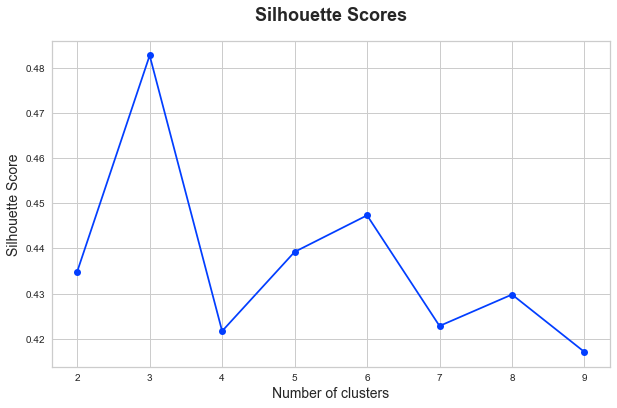

In [23]:
# Show the silhouette scores for our K-Means model (n_clusters from 2 to 9).
print("Silhouette Scores:\n")
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)  
    y_kmeans = kmeans.fit_predict(df_PCA)
    print(f'Silhouette Score(n = {i}): {round(silhouette_score(df_PCA, y_kmeans), 4)}')
    
# Solhouette scores in a lineplot.
silhouette_scores = []

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++', random_state=0)
    y_kmeans = kmeans.fit_predict(df_PCA)
    silhouette_scores.append(silhouette_score(df_PCA, y_kmeans))


plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Scores', fontsize=18, pad=20, fontweight='bold')
plt.grid(True)
plt.show()

### Silhouette Visualizer and Clusters Distribution

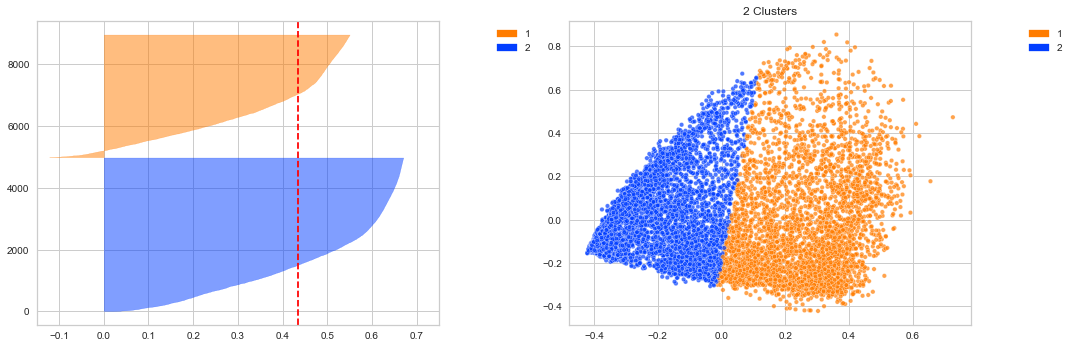

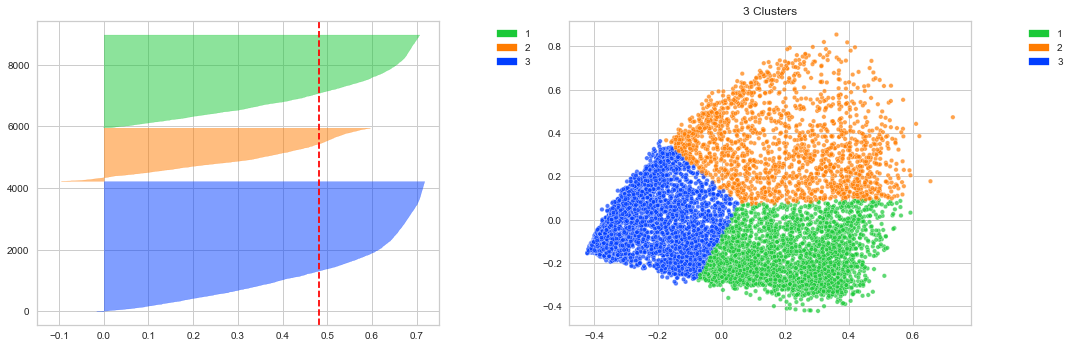

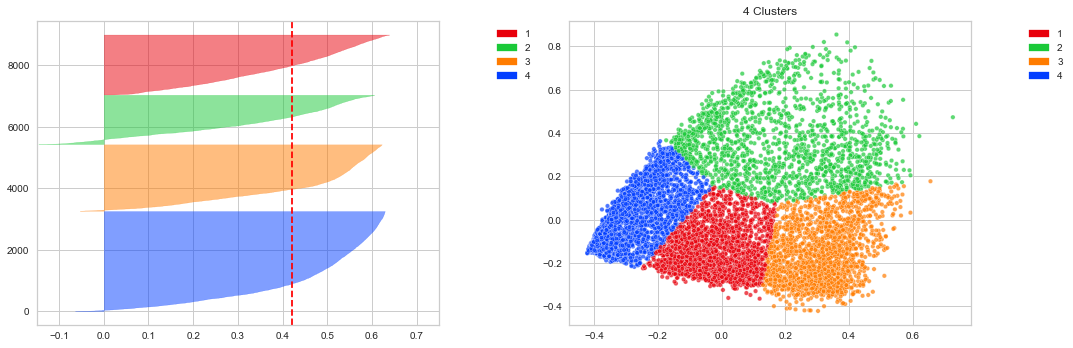

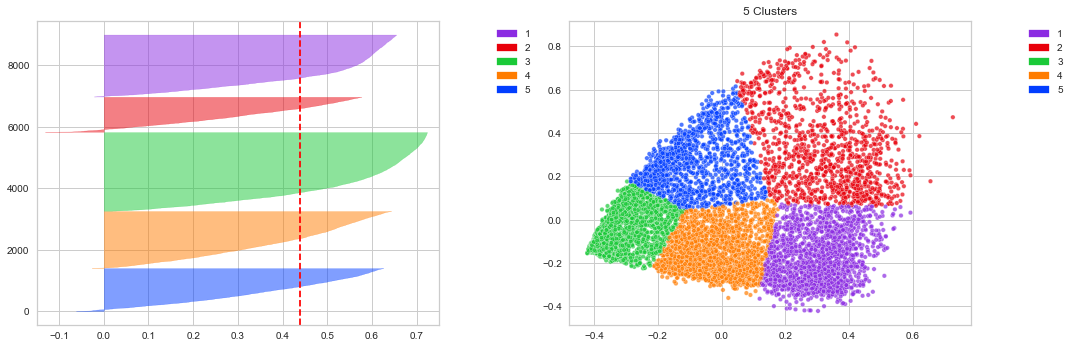

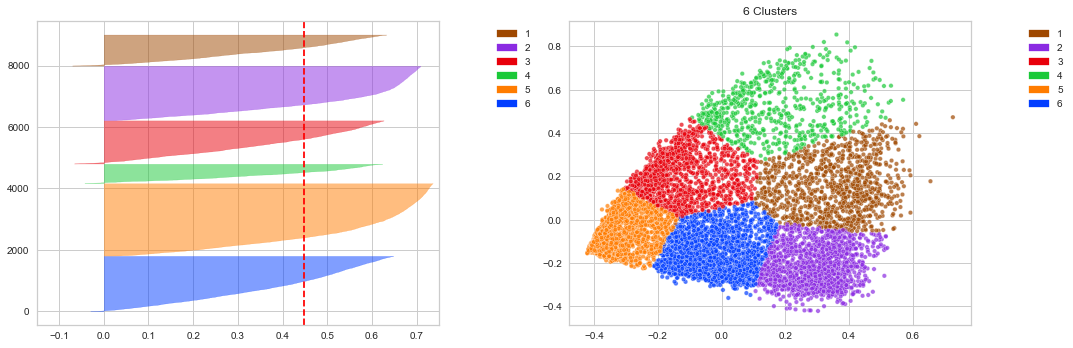

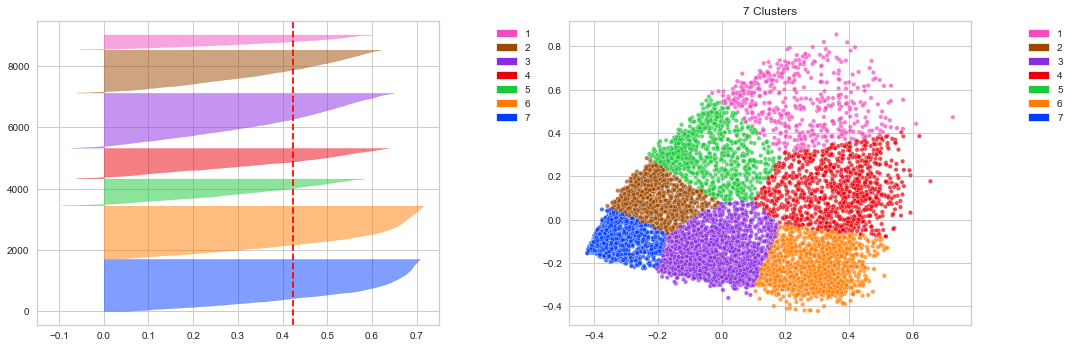

In [24]:
# Loop to plot the silhouette visualizer to a range of 2 and 8 clusters using K-Means Model.
for i, n_cluster in enumerate(range(2,8)):
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # K-Means model.
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    kmeans.fit(df_PCA)
    y_kmeans = kmeans.predict(df_PCA)

    # Setting colours and scatter plot parameters.
    colors = sns.color_palette("bright", n_colors=n_cluster)
    scatter = sns.scatterplot(x=df_PCA[:, 0], y=df_PCA[:, 1], hue=y_kmeans, palette=colors, alpha=0.7, edgecolor='white', s=20, ax=ax[1])
    ax[1].set_title('{} Clusters'.format(n_cluster))

    # Create legend
    legend_elements = [mpatches.Circle((0, 0), radius=1, color=colors[i]) for i in range(n_cluster)][::-1]
    ax[1].legend(legend_elements, range(1, n_cluster+1), loc='upper right', bbox_to_anchor=(1.25, 1))

    visualizer = SilhouetteVisualizer(kmeans, ax=ax[0], colors=colors)
    visualizer.fit(df_PCA)

    # Set x-axis range for silhouette visualizer.
    visualizer.ax.set_xlim([-0.15, 0.75])

    # Create legend for SilhouetteVisualizer in the correct order.
    silhouette_legend_elements = [mpatches.Patch(color=colors[i], label='{}'.format(n_cluster - i)) 
                                  for i in range(n_cluster)][::-1]  # inverte a ordem dos elementos de legenda e inverte a numeração
    ax[0].legend(handles=silhouette_legend_elements, loc='upper right', bbox_to_anchor=(1.25, 1))

    plt.tight_layout()
    plt.show()

# 

###  Model 1: Considering Heuristic Methods

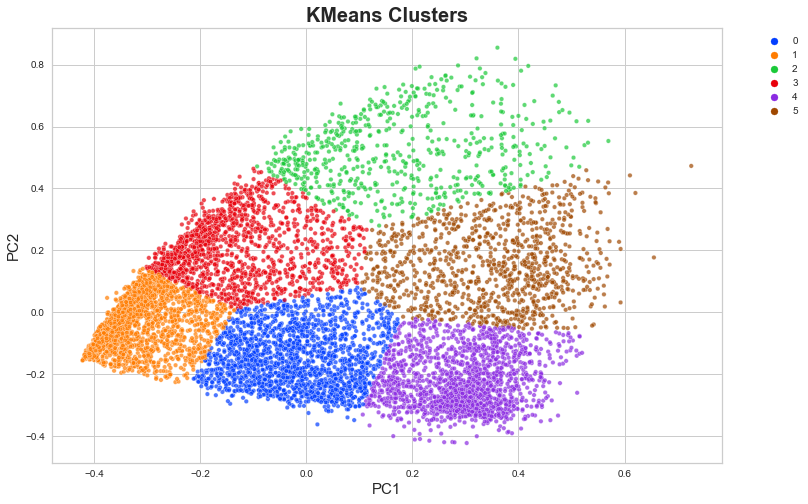

In [25]:
# Model with the n_clusters identified in the heuristic method
kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
kmeans.fit(df_PCA)

y_kmeans1 = kmeans.predict(df_PCA)

# K-Means Clusters in a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_PCA[:, 0], y=df_PCA[:, 1], hue=y_kmeans1, palette='bright', 
                alpha=0.7, edgecolor='white', s=20, legend='brief')

plt.title('KMeans Clusters',fontsize=20, fontweight='bold', ha='center')
plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show() 

### Model 1: Metrics

In [26]:
# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(df_PCA, y_kmeans1)

# Silhouette Coefficient/Score
s_score = silhouette_score(df_PCA, y_kmeans1)

# Davis-Bouldin Index
db_score = davies_bouldin_score(df_PCA, y_kmeans1)

print("\nCalinski-Harabasz Index: {:.4f}".format(ch_score))
print("\nSilhouette Coefficient/Score: {:.4f}".format(s_score))
print("\nDavis-Bouldin Index: {:.4f}".format(db_score))


Calinski-Harabasz Index: 11135.4123

Silhouette Coefficient/Score: 0.4473

Davis-Bouldin Index: 0.7329


# 

<h2 style="text-align:center;font-weight:bold">K-Means</h2>

<h2 style="text-align:center;font-weight:bold">-Hyper Parameter Tunning-</h2>

### Selecting the best parameters (Randomized Search)

In [27]:
# Selecting the parameters and possible values.
params = {
    "n_clusters": randint(2, 10),
    "init": ["k-means++", "random"],
    "n_init": randint(10, 50),
    "max_iter": randint(100, 301),
    "tol": [0.0001, 0.001, 0.01]
}

# K-Means Model.
kmeans = KMeans()

# Score Metric.
scorer = silhouette_score

# RandomizedSearchCV.
random_search = RandomizedSearchCV(kmeans, param_distributions=params, n_iter=50, scoring=scorer, random_state = 0)

random_search.fit(df_PCA)

# Print the best parameters found.
print("\nThe best parameters found:", random_search.best_params_)


The best parameters found: {'init': 'k-means++', 'max_iter': 147, 'n_clusters': 7, 'n_init': 10, 'tol': 0.001}


### Model 2:  Hyperparameters Adjusted 

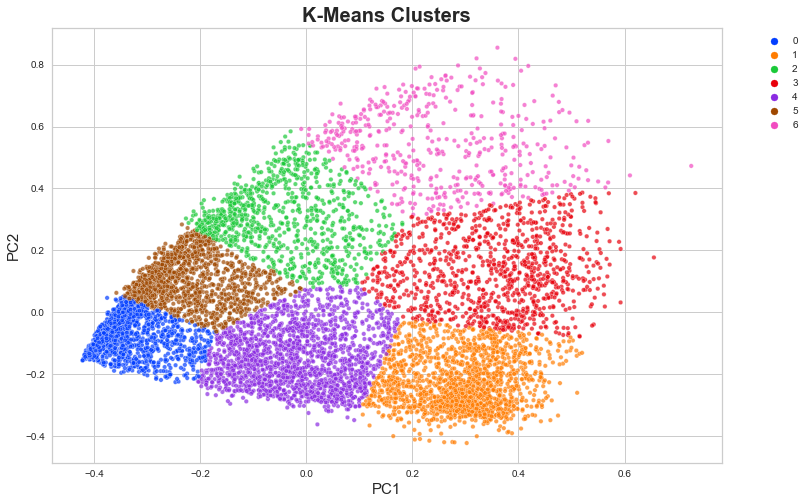

In [28]:
# Model with the best parameters found by RandomizedSearchCV
kmeans = KMeans(n_clusters=7, random_state=0,n_init=10,tol=0.001 ,max_iter=147,init='k-means++')
kmeans.fit(df_PCA)

y_kmeans2 = kmeans.predict(df_PCA)

# K-Means Clusters in a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_PCA[:, 0], y=df_PCA[:, 1], hue=y_kmeans2, palette='bright', 
                alpha=0.7, edgecolor='white', s=20, legend='brief')

plt.title('K-Means Clusters',fontsize=20, fontweight='bold', ha='center')
plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show() 

### Model 2: Metrics

In [29]:
# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(df_PCA, y_kmeans2)

# Silhouette Coefficient/Score
s_score = silhouette_score(df_PCA, y_kmeans2)

# Davis-Bouldin Index
db_score = davies_bouldin_score(df_PCA, y_kmeans2)

print("\nCalinski-Harabasz Index: {:.4f}".format(ch_score))
print("\nSilhouette Coefficient/Score: {:.4f}".format(s_score))
print("\nDavis-Bouldin Index: {:.4f}".format(db_score))


Calinski-Harabasz Index: 10873.4043

Silhouette Coefficient/Score: 0.4228

Davis-Bouldin Index: 0.7578


# 

# 

<h2 style="text-align:center;font-weight:bold">Hierarchical Implementation</h2>

<h2 style="text-align:center;font-weight:bold">-Heuristic Methods-</h2>

### Dendrogram Diagram Analysis and Visualization

In [30]:
# Visualize dataset after PCA.
df_PCA = pd.DataFrame(data=df_PCA, columns=[f"PC{i}" for i in range(1, pca.n_components_+1)])

# Display first and last 5 records.
display(df_PCA.head())
display(df_PCA.tail())

PC1       PC2
0 -0.278502  0.005437
1  0.161285 -0.004874
2 -0.137298 -0.182287
3 -0.219285 -0.162272
4  0.222097 -0.059321

PC1       PC2
8944 -0.239540  0.210302
8945 -0.026400  0.119093
8946 -0.347235 -0.025994
8947 -0.311591 -0.119655
8948 -0.018637  0.207665

In [31]:
# Choose a method (single, complete, average, ward)
Z = linkage(df_PCA, method='complete')
print("\nChecking the distances:\n")
print(Z)


Checking the distances:

[[1.77800000e+03 4.42600000e+03 0.00000000e+00 2.00000000e+00]
 [6.43000000e+02 4.14000000e+03 0.00000000e+00 2.00000000e+00]
 [8.83000000e+02 2.45400000e+03 0.00000000e+00 2.00000000e+00]
 ...
 [1.78900000e+04 1.78920000e+04 8.60082943e-01 1.19800000e+03]
 [1.78910000e+04 1.78930000e+04 9.89646851e-01 7.75100000e+03]
 [1.78940000e+04 1.78950000e+04 1.30843092e+00 8.94900000e+03]]


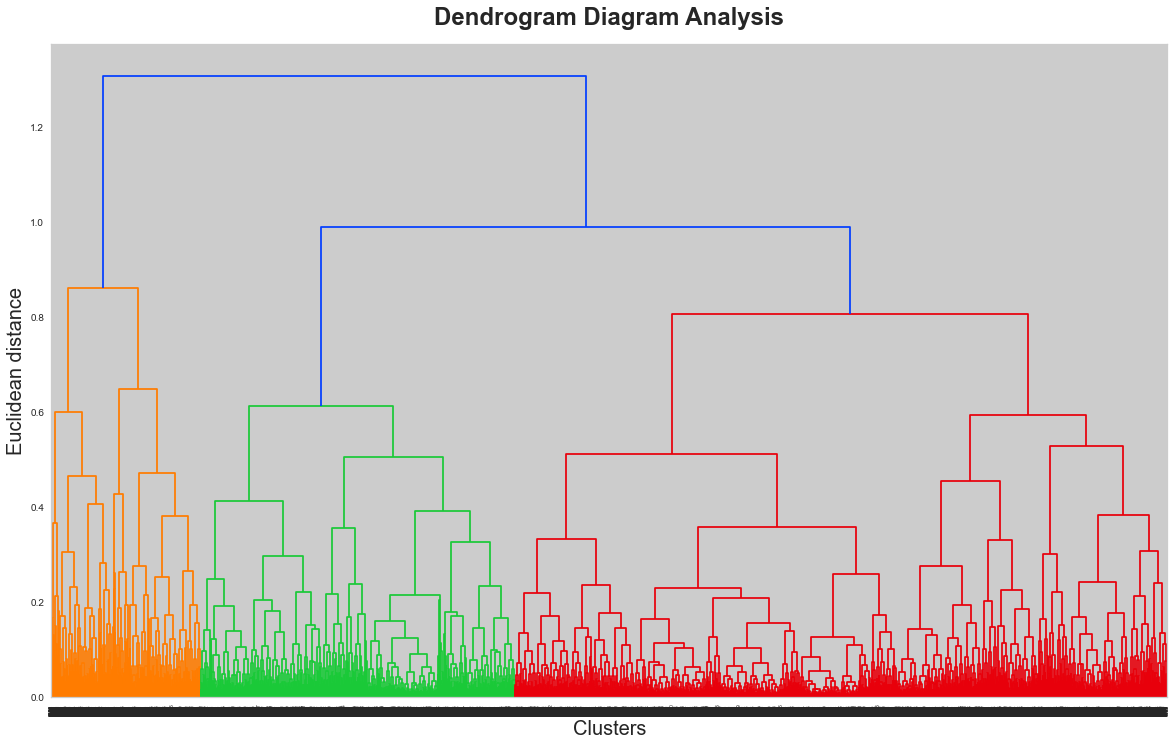

In [32]:
# Plotting a Dendrogram.
Z = sch.linkage(df_PCA, method='complete') # Chosen method 'complete' (Distance between 2 groups - greatest distance)
plt.figure(figsize=(20,12))
sch.dendrogram(Z)
plt.title('Dendrogram Diagram Analysis', fontsize=24, pad=20, fontweight='bold')
plt.xlabel('Clusters', fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

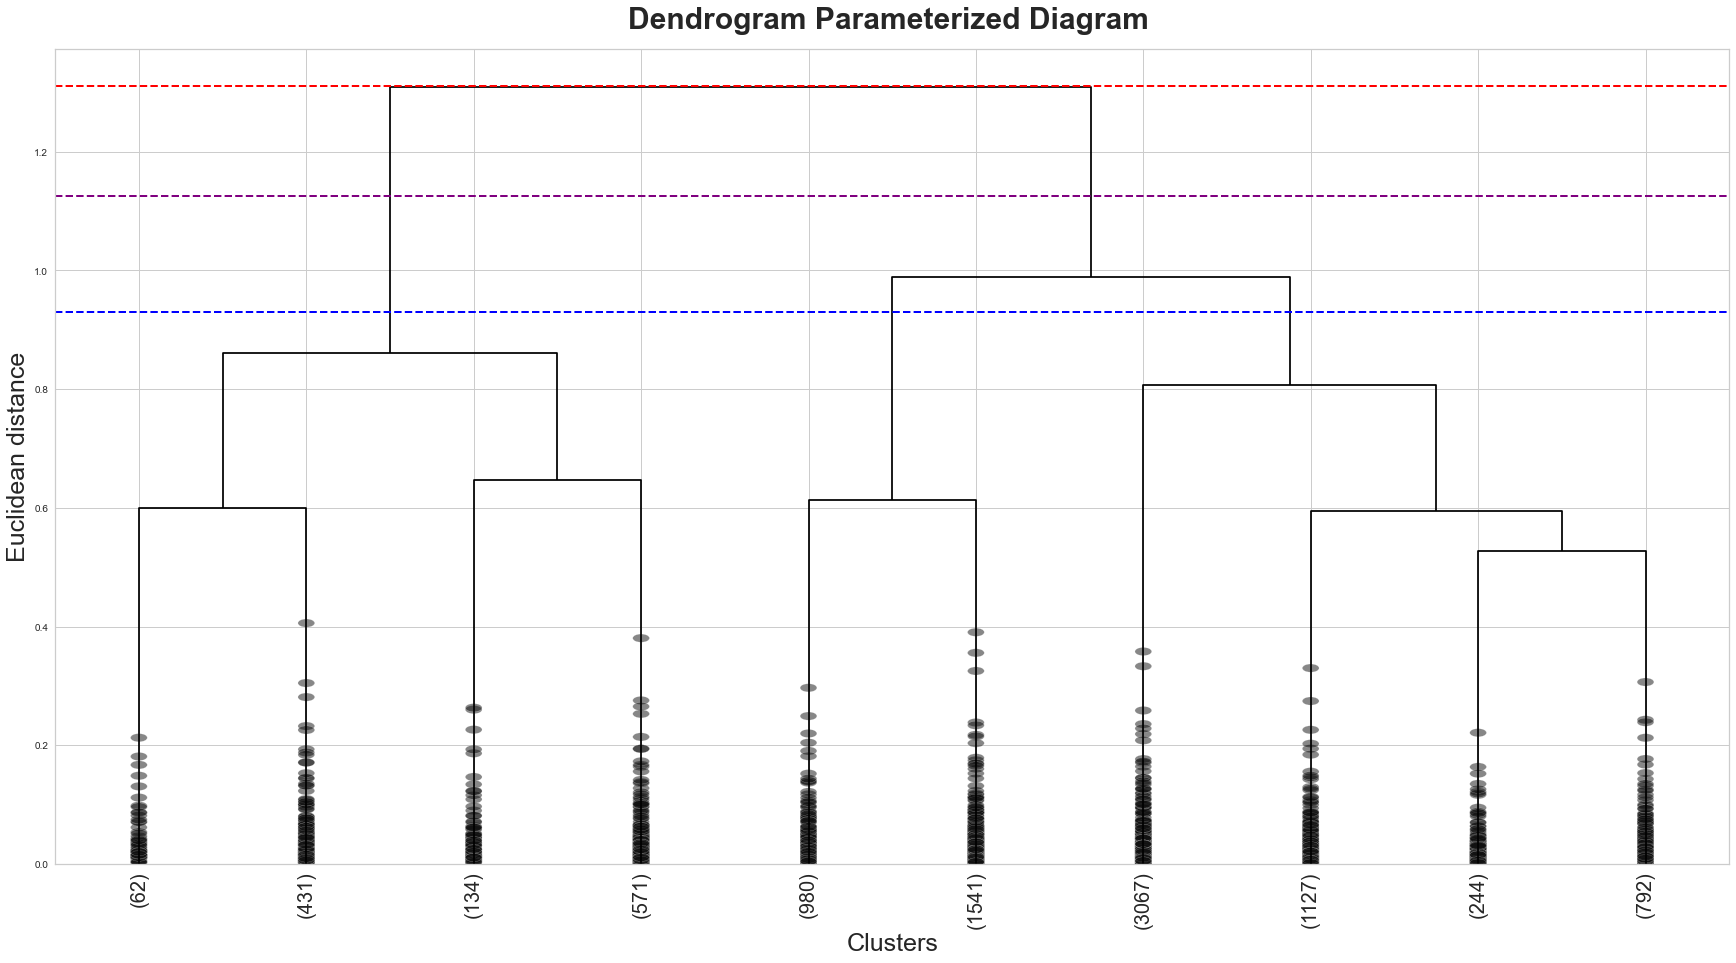

In [33]:
# Better parameterization of Dendrogram (Heuristic Analysis).

fig, ax = plt.subplots(figsize=(30, 15))
ax = dendrogram(
Z,
truncate_mode='lastp',          # Show the last 'p' merged clusters.
p=10,                           # Last 10 'p'. 
show_leaf_counts=True,          # Number of data points.
leaf_rotation=90.,              # Rotate leaves's label in 90 degrees. 
leaf_font_size=20.,             # Set the leaves's font size.
labels=df_PCA.index,            
show_contracted=True,           # Which branches were contracted. 
above_threshold_color='black',  # Line colours.
color_threshold=0.1,            # Merge clusters below 0.1 distance in the same colour.
)

# The best cut off analised through Heuristic method 

plt.axhline(y=0.93, c='blue', lw=2, linestyle='dashed') # Blue line starts (ideal cut off between blue and purple lines).
plt.axhline(y=1.125, c='purple', lw=2, linestyle='dashed') # Between lines where blue line finishes and red line starts
plt.axhline(y=1.31, c='red', lw=2, linestyle='dashed') # Red line finishes (not ideal cut off between purple and red lines).

plt.title('Dendrogram Parameterized Diagram ', fontsize=30, pad=20, fontweight='bold')
plt.xlabel('Clusters', fontsize=25)
plt.ylabel('Euclidean distance', fontsize=25);

### Model 1: Considering Heuristic Methods

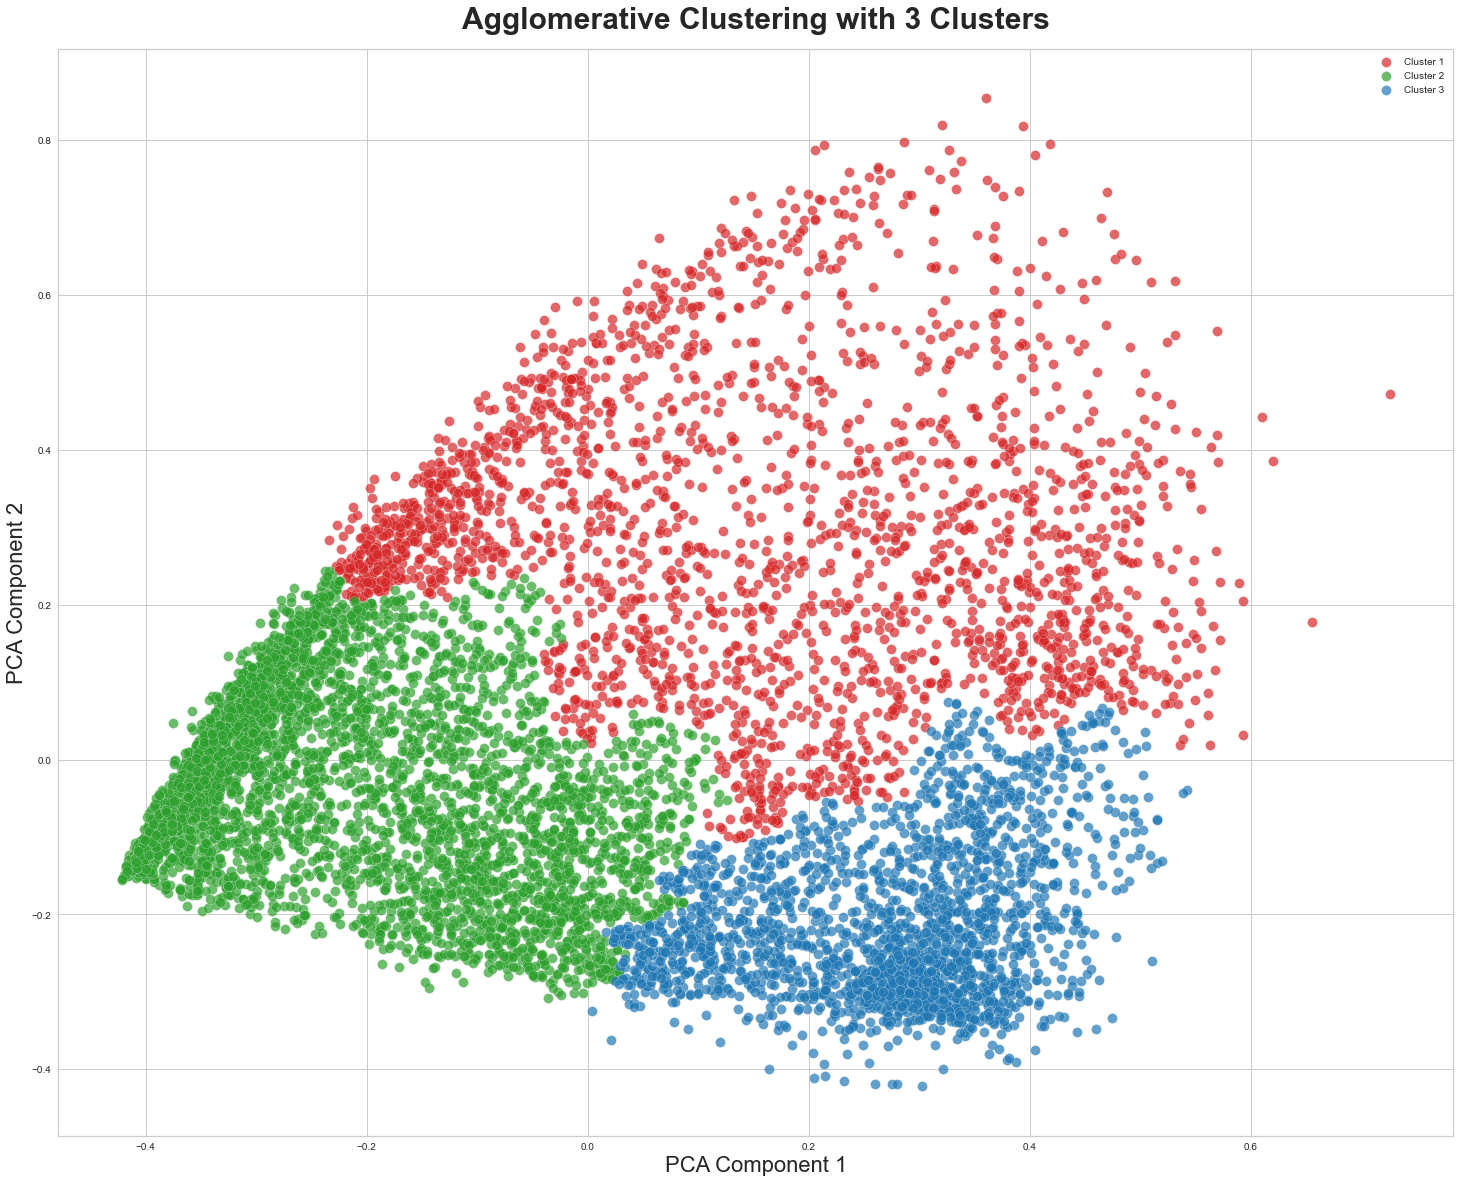

In [34]:
# Model with the n_clusters identified in the heuristic method
agc = AgglomerativeClustering(n_clusters=3, linkage='ward') # method chosen for group objects per variance: 'ward'
clusters = agc.fit_predict(df_PCA)

# Agglomerative Clusteting in a scatter plot
colors = ['tab:red', 'tab:green', 'tab:blue'] # chosen colours to differentiate clusters


fig, ax = plt.subplots(figsize=(25,20))
for i in range(3):   # create a loop over the range of the numbers of clusters                                                               
    ax.scatter(df_PCA.loc[clusters==i, 'PC1'], df_PCA.loc[clusters==i, 'PC2'], 
               c=colors[i], label=f'Cluster {i+1}', alpha=0.7, edgecolor='white', s=100) 

# Previously parameters: Alpha brings transparency, edgecolor set color edges for the points, s set the size of the points.
ax.set_xlabel('PCA Component 1', fontsize=22)
ax.set_ylabel('PCA Component 2', fontsize=22)
ax.set_title('Agglomerative Clustering with 3 Clusters', fontsize=30, pad=20, fontweight='bold')
ax.legend()
plt.show()

### Model 1: Metrics

In [35]:
# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(df_PCA, clusters)

# Silhouette Coefficient/Score
s_score = silhouette_score(df_PCA, clusters)

# Davis-Bouldin Index
db_score = davies_bouldin_score(df_PCA, clusters)

print("\nCalinski-Harabasz Index: {:.4f}".format(ch_score))
print("\nSilhouette Coefficient/Score: {:.4f}".format(s_score))
print("\nDavis-Bouldin Index: {:.4f}".format(db_score))


Calinski-Harabasz Index: 8649.8700

Silhouette Coefficient/Score: 0.4448

Davis-Bouldin Index: 0.8384


# 

<h2 style="text-align:center;font-weight:bold">Hierarchical</h2>

<h2 style="text-align:center;font-weight:bold">-Hyper Parameter Tunning-</h2>

### Selecting the best parameters (Randomized Search)

In [36]:
# Implementing hyperparameters tunning.

# Define parameters.
param_dist = {
    "n_clusters": randint(2, 10),
    "affinity": ["euclidean", "manhattan", "cosine", "precomputed"],
    "linkage": ["ward", "complete", "average"]
}

# Apply the model Agglomerative Clustering.
agc = AgglomerativeClustering()
scorer = silhouette_score

# RandomizedSearchCV.
random_search = RandomizedSearchCV(agc, param_distributions=param_dist, n_iter=20, cv=5, scoring=scorer, random_state=0)
random_search.fit(df_PCA)

# Score Metric.
best_score = random_search.best_score_

# Print the best parameters found.
print("Best Parameters Found:")
print(random_search.best_params_)
print(best_score)

Best Parameters Found:
{'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 2}
nan


### Model 2:  Hyperparameters Adjusted 

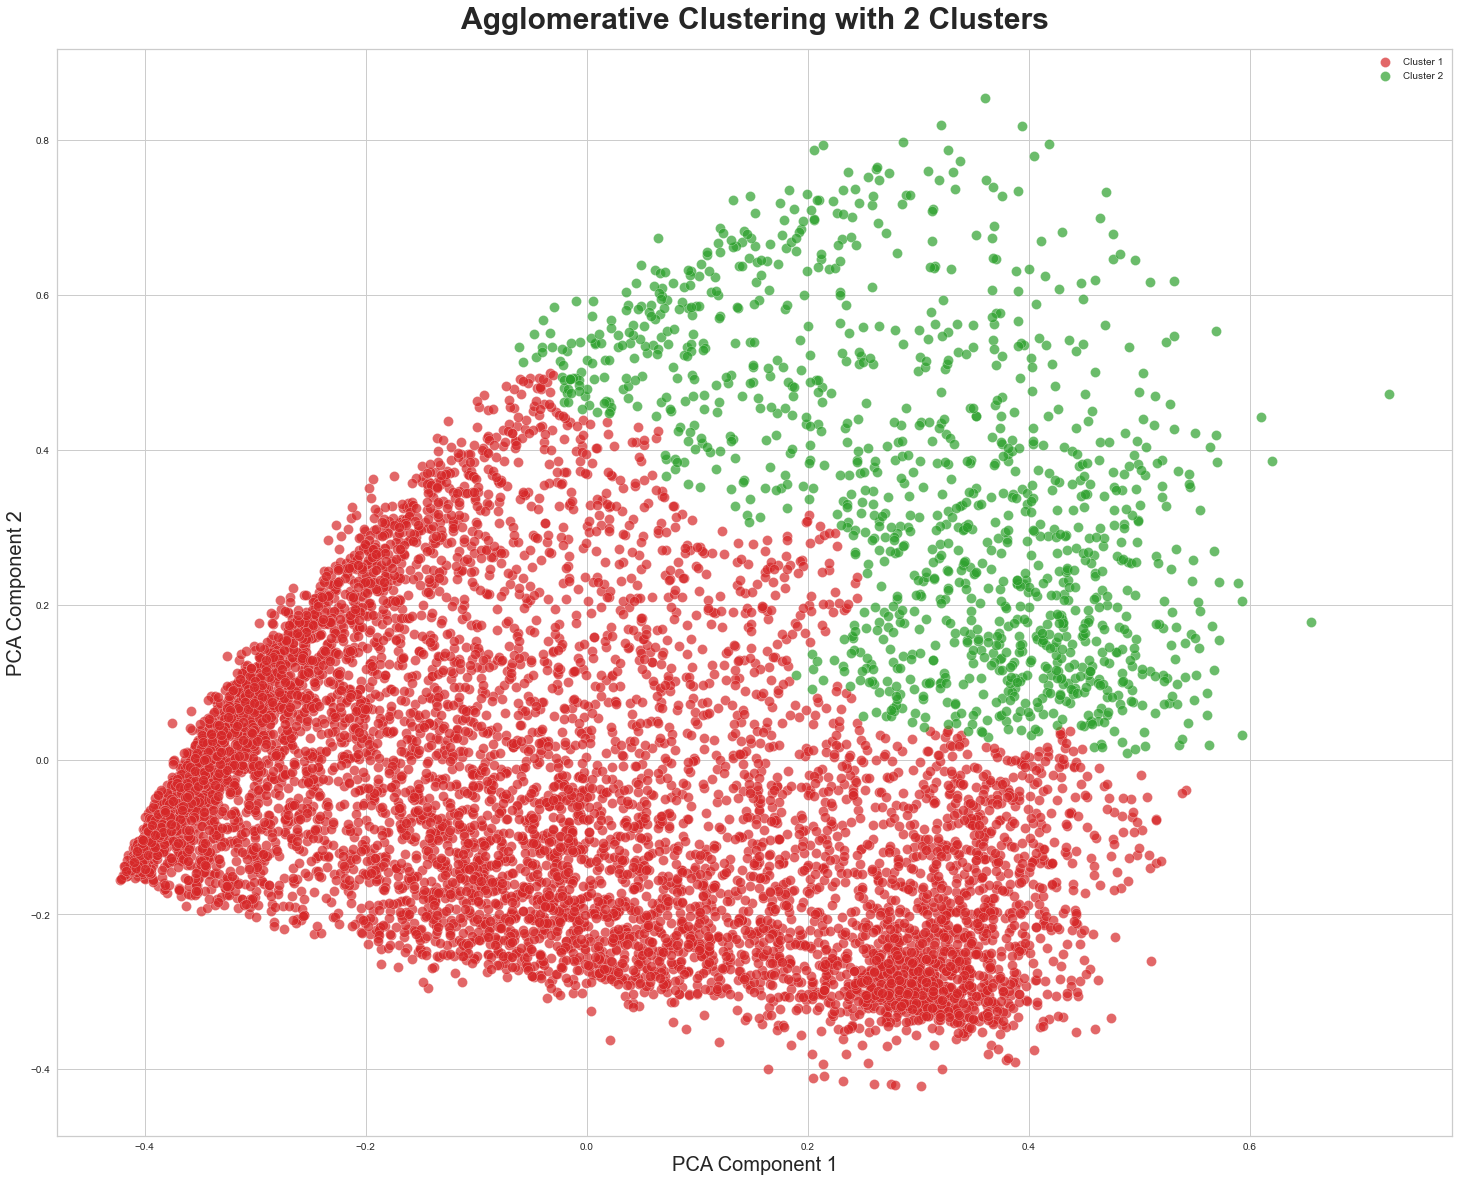

In [37]:
# Model with the best parameters found by RandomizedSearchCV

agc = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity = 'euclidean') # chosen method by the hyperparameters
clusters = agc.fit_predict(df_PCA)

# Agglomerative Clusteting in a scatter plot

colors = ['tab:red', 'tab:green'] # chosen colours to differentiate clusters


fig, ax = plt.subplots(figsize=(25,20))
for i in range(2):
    ax.scatter(df_PCA.loc[clusters==i, 'PC1'], df_PCA.loc[clusters==i, 'PC2'], 
               c=colors[i], label=f'Cluster {i+1}', alpha=0.7, edgecolor='white', s=100)

# Previously parameters: Alpha brings transparency, edgecolor set color edges for the points, s set the size of the points.
    
ax.set_xlabel('PCA Component 1', fontsize=20)
ax.set_ylabel('PCA Component 2', fontsize=20)
ax.set_title('Agglomerative Clustering with 2 Clusters', fontsize=30, pad=20, fontweight='bold')
ax.legend()
plt.show()

### Model 2: Metrics

In [38]:
# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(df_PCA, clusters)

# Silhouette Coefficient/Score
s_score = silhouette_score(df_PCA, clusters)

# Davis-Bouldin Index
db_score = davies_bouldin_score(df_PCA, clusters)

print("\nCalinski-Harabasz Index: {:.4f}".format(ch_score))
print("\nSilhouette Coefficient/Score: {:.4f}".format(s_score))
print("\nDavis-Bouldin Index: {:.4f}".format(db_score))


Calinski-Harabasz Index: 3330.0260

Silhouette Coefficient/Score: 0.3824

Davis-Bouldin Index: 0.9600


# 

# 

<h2 style="text-align:center;font-weight:bold">DBSCAN Implementation</h2>

<h2 style="text-align:center;font-weight:bold">-Heuristic Methods-</h2>

### K-Distance Graph

In [39]:
# Initialise an object neigh by calling a method NearestNeighbors()
neigh = NearestNeighbors(n_neighbors = 2)

# Train the model by calling a method fit()
nbrs = neigh.fit(df_PCA)

# Store the distance and indices into distances and indices arrays
distances, indices = nbrs.kneighbors(df_PCA)

print("\nChecking the distances:\n")
print(distances, indices)


Checking the distances:

[[0.         0.00136344]
 [0.         0.00601024]
 [0.         0.00116515]
 ...
 [0.         0.0008785 ]
 [0.         0.00362599]
 [0.         0.01658557]] [[   0 8212]
 [   1 4998]
 [   2 3397]
 ...
 [8946 6091]
 [8947 7134]
 [8948 1617]]


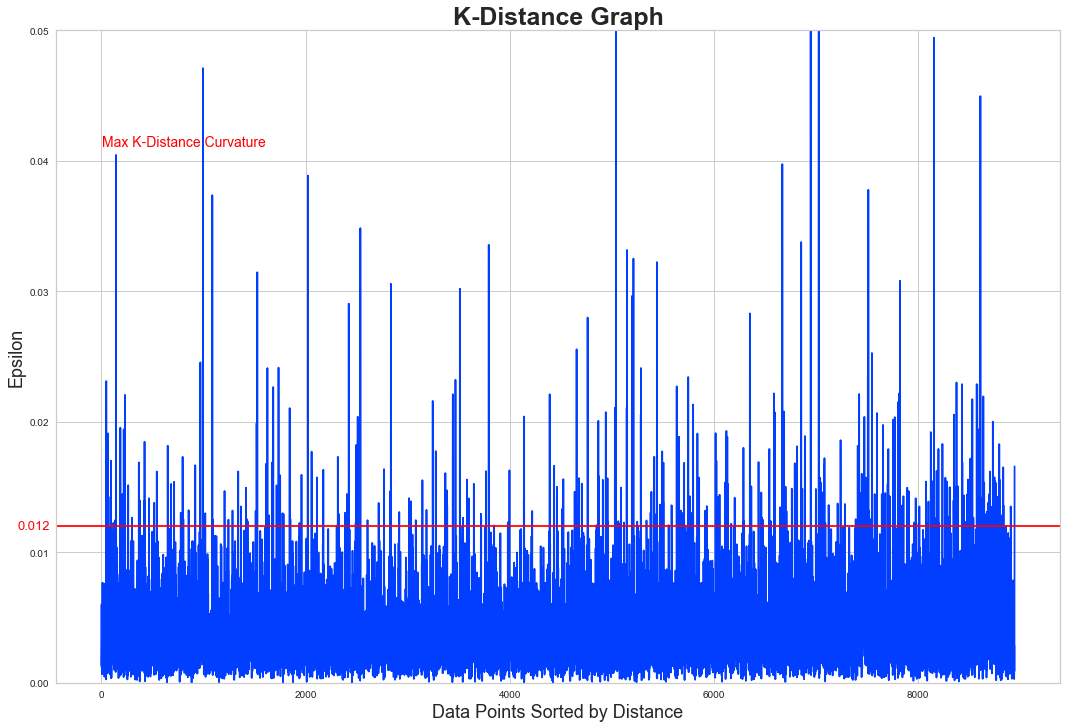

In [40]:
# K-Distance Graph
distances = distances[:, 1]
plt.figure(figsize = (18, 12))
plt.plot(distances)
plt.axhline(y=0.012, color='red')
plt.ylim(0, 0.05)
plt.title('K-Distance Graph', fontsize = 25, fontweight='bold', ha='center')
plt.xlabel('Data Points Sorted by Distance', fontsize = 18)
plt.ylabel('Epsilon', fontsize = 18)
plt.annotate('0.012', xy=(0, 0.012), xytext=(-500, 0.012), color='red', fontsize=13, ha='right', va='center')
plt.text(10, 0.042, 'Max K-Distance Curvature', color='red', fontsize=14, ha='left', va='top')
plt.show()

### Ideal Epsilon Curvature

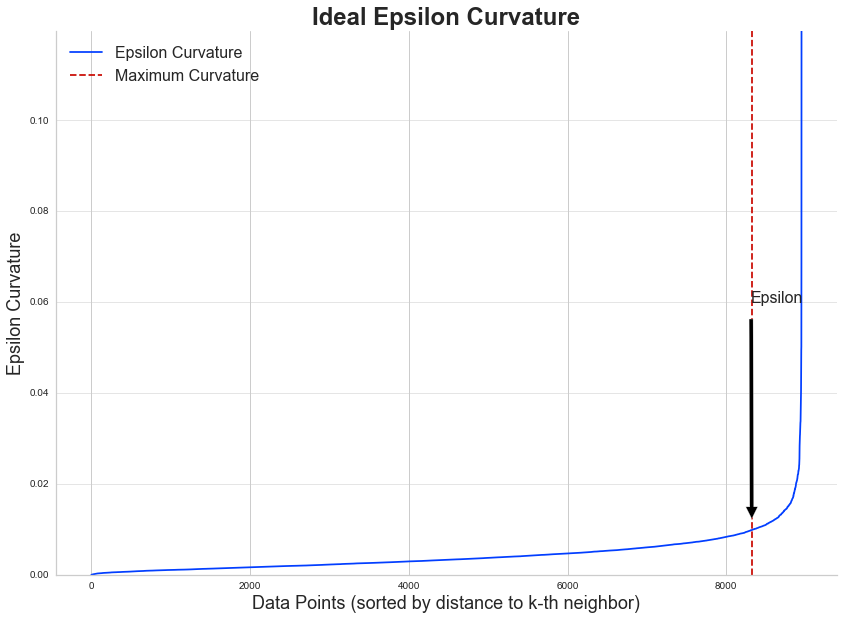

In [41]:
# Calculate the distance between each point and its k-nearest neighbors.
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(df_PCA)
distances, indices = neighbors_fit.kneighbors(df_PCA)

# Sort distances in ascending order.
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Define figure and axes objects.
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the distance of points to their k-nearest neighbors.
ax.plot(distances, label='Epsilon Curvature')

# Select the ideal curvature for Epsilon (for example, a value of 0.95 for the curvature coefficient).
eps_curvature = 0.93
eps_idx = int(len(df_PCA) * eps_curvature)
ax.axvline(x=eps_idx, color='r', linestyle='--', label='Maximum Curvature')

# Add arrow pointing to the intersection of the two lines
ax.annotate('Epsilon', xy=(eps_idx, distances[eps_idx]), xytext=(eps_idx-10, distances[eps_idx]+0.05), arrowprops=dict(facecolor='black', shrink=0.05),fontsize = 16)

# Set axes labels and title.
ax.set_xlabel('Data Points (sorted by distance to k-th neighbor)',fontsize = 18)
ax.set_ylabel('Epsilon Curvature',fontsize = 18)
ax.set_title('Ideal Epsilon Curvature',fontsize = 24, fontweight='bold', ha='center')

# Add legend
ax.legend(fontsize = 16)

# Set y-axis limit to be the maximum value of the distances array, to prevent any data points from being cut off.
ax.set_ylim([0, max(distances)])

# Enhancements.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.5)
plt.show()

### Model 1: Considering Heuristic Methods

In [42]:
dbscan = DBSCAN(eps=0.012, min_samples=5)
dbscan.fit(df_PCA)

# Get cluster labels.
labels = dbscan.labels_

# Creating a new DataFrame.
df_dbscan1 = df_PCA
df_dbscan1['Clusters'] = labels


# Identify number of clusters and number of points in each cluster.
n_clusters = len(set(labels))
n_noise = list(labels).count(-1)


# Print the number of clusters and number of points in each cluster.
print(f'Number of clusters: {n_clusters}')
print(f'Number of points labeled as noise: {n_noise}')

Number of clusters: 111
Number of points labeled as noise: 1346


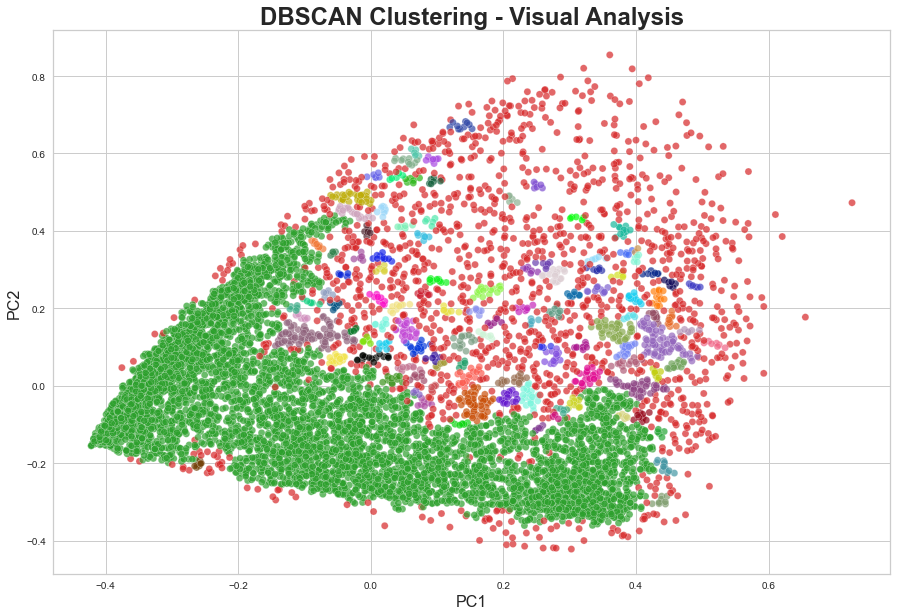

In [43]:
# Define the colors to be used.
base_colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:orange']

# create a list with the RGB values of each color.
rgb_values = [mcolors.to_rgba(color)[:3] for color in base_colors]

# Define the number of colors desired in the color map.
n_colors = 175

# Add more colors to the color map.
for i in range(n_colors - len(base_colors)):
    r = np.random.uniform(0.0, 1.0)
    g = np.random.uniform(0.0, 1.0)
    b = np.random.uniform(0.0, 1.0)
    rgb_values.append((r, g, b))

# Create a custom color map with 175 colors using the defined colors above.
cmap = mcolors.LinearSegmentedColormap.from_list([base_colors, "my_colormap"], rgb_values, N=n_colors)

# Plot the chart with the new color map
plt.figure(figsize = (15, 10))
plt.scatter(df_dbscan1['PC1'], df_dbscan1['PC2'], c = df_dbscan1['Clusters'], alpha = 0.7, edgecolor = 'white', s=50, cmap = cmap)
plt.title('DBSCAN Clustering - Visual Analysis',fontsize = 24, fontweight='bold', ha='center')
plt.xlabel('PC1', fontsize = 16)
plt.ylabel('PC2', fontsize = 16)
plt.show()

### Model 1: Metrics

In [44]:
#  Calinski-Harabasz Index.
ch_score = calinski_harabasz_score(df_PCA, labels)

# Silhouette Coefficient/Score.
s_score = silhouette_score(df_PCA, labels)

# Davis-Boudldin Index.
db_score = davies_bouldin_score(df_PCA, labels)

print("\nCalinski-Harabasz Index: {:.4f}".format(ch_score))
print("\nSilhouette Coefficient/Score: {:.4f}".format(s_score))
print("\nDavis-Bouldin Index: {:.4f}".format(db_score))


Calinski-Harabasz Index: 317666.3179

Silhouette Coefficient/Score: 0.7160

Davis-Bouldin Index: 0.0340


# 

<h2 style="text-align:center;font-weight:bold">DBSCAN</h2>

<h2 style="text-align:center;font-weight:bold">-Hyper Parameter Tunning-</h2>

### Selecting the best parameters (Randomized Search)

In [45]:
# Define the hyperparameters to be tuned.
param_dist = {
    'eps': uniform(0.08, 1.0),  # Range of values for eps.
    'min_samples': range(1, 11),  # Range of values for min_samples.
}

# Create an instance of DBSCAN
dbscan = DBSCAN()

# Choose the Silhouette Score evaluation metric.
scorer = silhouette_score

# Create an instance of RandomizedSearchCV with scoring by silhouette.
random_search = RandomizedSearchCV(dbscan, param_distributions=param_dist, n_iter=50, cv=5, random_state=0, scoring=scorer)

# Train the model with the training data.
random_search.fit(df_PCA)

# Get the best hyperparameters found.
best_eps = random_search.best_params_['eps']
best_min_samples = random_search.best_params_['min_samples']

# Create a new instance of DBSCAN with the best hyperparameters.
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

# Train the final model with all the training data.
best_dbscan.fit(df_PCA)

# Calculate the silhouette score of the model.
score = silhouette_score(df_PCA, best_dbscan.labels_)

print("The value of the Silhouette Score obtained was: ", score)
print("The EPS value obtained was: ", best_eps)
print("The Min Samples value obtained was: ", best_min_samples)

The value of the Silhouette Score obtained was:  0.6873375906387845
The EPS value obtained was:  0.6288135039273247
The Min Samples value obtained was:  6


### Model 2:  Hyperparameters Adjusted 

In [46]:
dbscan = DBSCAN(eps=0.6288135039273247, min_samples=6)
dbscan.fit(df_PCA)

# Get cluster labels
labels2 = dbscan.labels_

# creating a new DataFrame
df_dbscan2 = df_PCA
df_dbscan2['Clusters'] = labels2 

# Identify number of clusters and number of points in each cluster
n_clusters2 = len(set(labels2))
n_noise2 = list(labels2).count(-1)

# Print the number of clusters and number of points in each cluster
print(f'Number of clusters: {n_clusters2}')
print(f'Number of points labeled as noise: {n_noise2}')

Number of clusters: 84
Number of points labeled as noise: 132


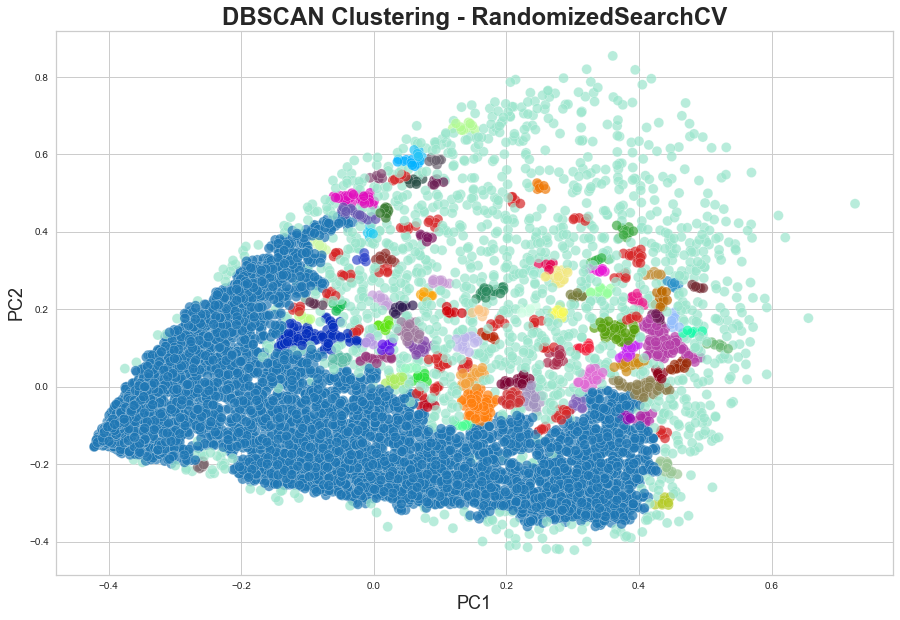

In [47]:
# Define the colors to be used.
base_colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:orange']

# Create a list with the RGB values of each color
rgb_values = [mcolors.to_rgba(color)[:3] for color in base_colors]

# Define the number of colors desired in the color map
n_colors = 175

# Add more colors to the color map.
for i in range(n_colors - len(base_colors)):
    r = np.random.uniform(0.0, 1.0)
    g = np.random.uniform(0.0, 1.0)
    b = np.random.uniform(0.0, 1.0)
    rgb_values.append((r, g, b))

# Create a custom color map with 175 colors using the defined colors above.
cmap = mcolors.LinearSegmentedColormap.from_list([base_colors, "my_colormap"], rgb_values, N=n_colors)

# Plot the chart with the new color map.
plt.figure(figsize = (15, 10))
plt.scatter(df_dbscan2['PC1'], df_dbscan2['PC2'], c = df_dbscan2['Clusters'], alpha = 0.7, edgecolor = 'white', s=100, cmap = cmap)
plt.title('DBSCAN Clustering - RandomizedSearchCV',fontsize = 24, fontweight='bold', ha='center')
plt.xlabel('PC1', fontsize = 18)
plt.ylabel('PC2', fontsize = 18)
plt.show()

### Model 2: Metrics

In [48]:
#  Calinski-Harabasz Index
ch_score = calinski_harabasz_score(df_PCA, labels2)

# Silhouette Coefficient/Score
s_score = silhouette_score(df_PCA, labels2)

# Davis-Boudldin Index
db_score = davies_bouldin_score(df_PCA, labels2)

print("\nCalinski-Harabasz Index: {:.4f}".format(ch_score))
print("\nSilhouette Coefficient/Score: {:.4f}".format(s_score))
print("\nDavis-Bouldin Index: {:.4f}".format(db_score))


Calinski-Harabasz Index: 240379.9200

Silhouette Coefficient/Score: 0.6902

Davis-Bouldin Index: 0.0476


# 

<h2 style="text-align:center;font-weight:bold">DBSCAN</h2>

<h2 style="text-align:center;font-weight:bold">-Samples-</h2>

### Model 3: Samples

In [49]:
# Defines the sample size you want to select.
n_sample = 1000

# Selects a random sample of n_sample observations from DataFrame df_pca
df_sample = df_PCA.sample(n=n_sample, random_state=0)

# Creates a DBSCAN object with the desired parameters.
dbscan = DBSCAN(eps=0.05, min_samples=3)

# Applies the DBSCAN on the selected sample.
labels3 = dbscan.fit_predict(df_sample[['PC1', 'PC2']])

# Identify number of clusters and number of points in each cluster.
n_clusters3 = len(set(labels3))
n_noise3 = list(labels3).count(-1)

# Print the number of clusters and number of points in each cluster.
print(f'Number of clusters: {n_clusters3}')
print(f'Number of points labelled as noise: {n_noise3}')

Number of clusters: 9
Number of points labelled as noise: 18


### Model 3: 1000 Samples

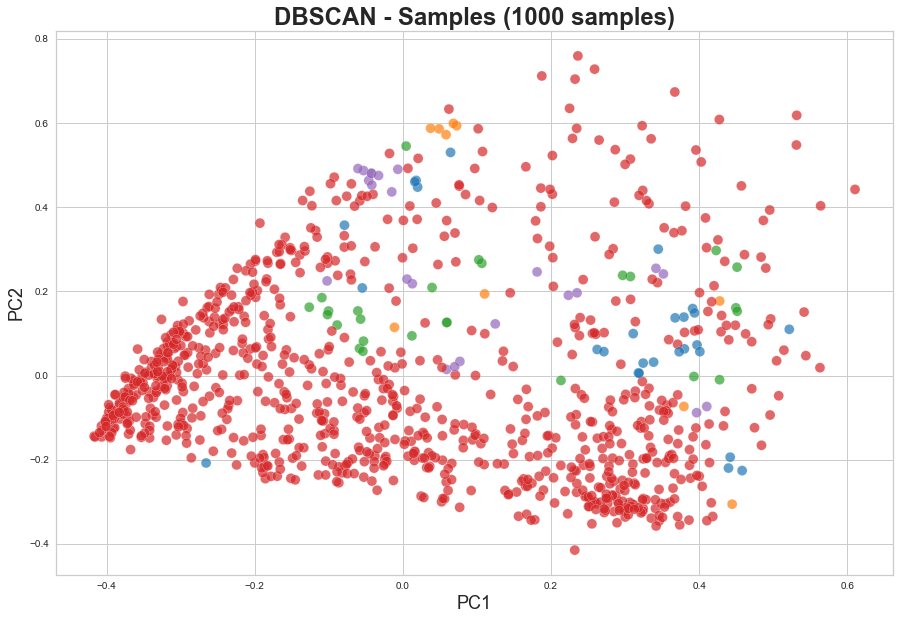

In [50]:
# Define the colors to be used.
base_colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:orange']

# Create a list with the RGB values of each color.
rgb_values = [mcolors.to_rgba(color)[:3] for color in base_colors]

# Define the number of colors desired in the color map.
n_colors = len(base_colors)

# create a custom color map with n_colors using the defined colors above.
cmap = mcolors.LinearSegmentedColormap.from_list([base_colors, "my_colormap"], rgb_values, N=n_colors)

# Plot the chart with the new color map.
plt.figure(figsize = (15, 10))
plt.scatter(df_sample['PC1'], df_sample['PC2'], c = df_sample['Clusters'], alpha = 0.7, edgecolor = 'white', s=100, cmap = cmap)
plt.title('DBSCAN - Samples (1000 samples)',fontsize = 24, fontweight='bold', ha='center')
plt.xlabel('PC1', fontsize = 18)
plt.ylabel('PC2', fontsize = 18)
plt.show()

In [51]:
# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(df_sample, labels3)

# Silhouette Coefficient/Score
s_score = silhouette_score(df_sample, labels3)

# Davis-Boudldin Index
db_score = davies_bouldin_score(df_sample, labels3)

print("\nCalinski-Harabasz Index: {:.4f}".format(ch_score))
print("\nSilhouette Coefficient/Score: {:.4f}".format(s_score))
print("\nDavis-Bouldin Index: {:.4f}".format(db_score))


Calinski-Harabasz Index: 2.3904

Silhouette Coefficient/Score: -0.5131

Davis-Bouldin Index: 22.7020


#  

# 

<h2 style="text-align:center;font-weight:bold">Outcomes</h2>

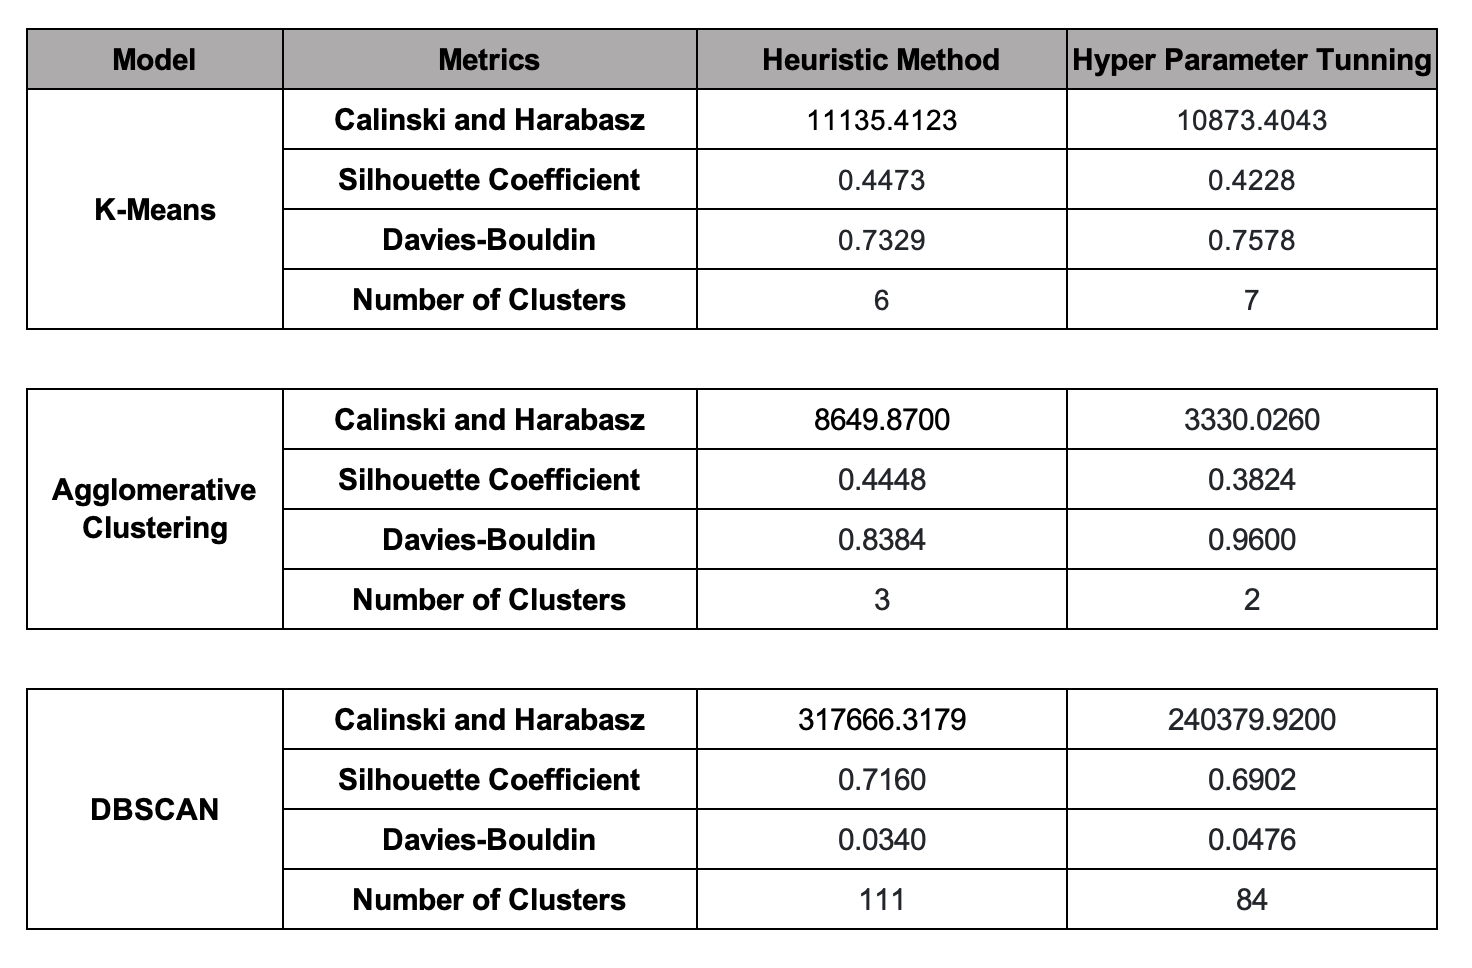

#  

<center><b>“Data really powers everything that we do.” — Jeff Weiner</b></center>

# 

<h2 style="text-align:center;font-weight:bold">Reference list</h2>

Alto, V. (2021). Introduction to Box Plots and How to Interpret Them. [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 [Accessed 22 Apr. 2023].

Arvai, K. (2020). K-Means Clustering in Python: a Practical Guide – Real Python. [online] realpython.com. Available at: https://realpython.com/k-means-clustering-python/ [Accessed 24 Apr. 2023].

Avinash Navlani, Fandango, A. and Idris, I. (2021). Python Data Analysis : Perform Data collection, Data processing, Wrangling visualization, and Model Building Using Python. Birmingham: Packt Publishing.

Bhasin, A. (2018). Credit Card Dataset for Clustering. [online] www.kaggle.com. Available at: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata [Accessed 16 Apr. 2023].

Biswas, A. (2023). Customer Segmentation with Python (Implementing STP Framework - Part 3/5). [online] Medium. Available at: https://towardsdatascience.com/customer-segmentation-with-python-implementing-stp-framework-part-3-e81a79181d07 [Accessed 25 Apr. 2023].

Carvalho, T. (2021). Visualizing Clusters with Python’s Matplotlib. [online] Medium. Available at: https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489 [Accessed 22 Apr. 2023].

Chaudhary, S. (2020). Why ‘1.5’ in IQR Method of Outlier Detection? [online] Medium. Available at: https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097 [Accessed 23 Apr. 2023].

Chowdhury, K.R. (2020). KNNImputer | Way To Impute Missing Values. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/ [Accessed 21 Apr. 2023].

Duff, I.S., Erisman, A.M. and John Ker Reid (2017). Direct Methods for Sparse Matrices. New York: Oxford University Press.

Emblem, H. (2022). A Case for Heuristics: Why Simple Solutions Often Win in Data Science. [online] Medium. Available at: https://towardsdatascience.com/a-case-for-heuristics-why-simple-solutions-often-win-in-data-science-a31967766daa [Accessed 27 Apr. 2023].

Franklin, S.J. (2019). Effect of Outliers on K-Means Algorithm Using Python. [online] Medium. Available at: https://medium.com/analytics-vidhya/effect-of-outliers-on-k-means-algorithm-using-python-7ba85821ea23 [Accessed 22 Apr. 2023].

GitHub (n.d.). Commits · oneapi-src/credit-card-fraud-detection. [online] GitHub. Available at: https://github.com/oneapi-src/credit-card-fraud-detection/commits?author=ashahba [Accessed 29 Apr. 2023].

Gopal Sakarkar, Gaurav Patil and Prateek Dutta (2021). Machine Learning Algorithms Using Python Programming. New York: Nova Science Publishers.

Hariom Tatsat (2020). MACHINE LEARNING AND DATA SCIENCE BLUEPRINTS FOR FINANCE : from Building Trading Strategies to... robo-advisors Using python. S.L.: O’reilly Media.

Houston, P. (2019). Set Index for DataFrame in Pandas. [online] Medium. Available at: https://medium.com/@petehouston/set-index-for-dataframe-in-pandas-55400e306e42 [Accessed 23 Apr. 2023].

IA Expert Academy (2022). Algoritmo DBSCAN em Python. [online] www.youtube.com. Available at: https://www.youtube.com/watch?v=VJGraVClYGA&ab_channel=IAExpertAcademy [Accessed 25 Apr. 2023].

Jha, W. (2021). Implementation of Principal Component Analysis(PCA) in K Means Clustering. [online] Analytics 
Vidhya. Available at: https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6 [Accessed 24 Apr. 2023].

Jones, A., Kruger, C. and Johnston, B. (2020). The Unsupervised Learning Workshop : Get Started with Unsupervised Learning Algorithms and Simplify Your Unorganized Data to Help Make Future Predictions. Birmingham, England: Packt.

Martulandi, A. (2019). K-Nearest Neighbors in Python + Hyperparameters Tuning. [online] Medium. Available at: https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f [Accessed 26 Apr. 2023].

Matplotlib Library (n.d.). Pyplot Tutorial — Matplotlib 3.4.2 Documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/tutorials/introductory/pyplot.html [Accessed 19 Apr. 2023].

Müller, A.C. and Guido, S. (2017). Introduction to Machine Learning with Python : a Guide for Data Scientists. 
Beijing: O’reilly.

Mullin, T. (2020). DBSCAN Parameter Estimation Using Python. [online] Medium. Available at: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd [Accessed 28 Apr. 2023].

Nantasenamat, C. (2021a). How to Tune Hyperparameters of Machine Learning Models. [online] Medium. Available at: https://towardsdatascience.com/how-to-tune-hyperparameters-of-machine-learning-models-a82589d48fc8 [Accessed 25 Apr. 2023].

Nantasenamat, C. (2021b). Schematic Illustration Comparing the 2 Common Hyperparameter Tuning approach: (1) Grid Search with (2) Random search. https://towardsdatascience.com/how-to-tune-hyperparameters-of-machine-learning-models-a82589d48fc8.

Numpy Library (n.d.). NumPy: the Absolute Basics for Beginners — NumPy v1.20 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/user/absolute_beginners.html [Accessed 20 Apr. 2023].

Nyuytiymbiy, K. (2021). Parameters and Hyperparameters in Machine Learning and Deep Learning. [online] Medium. Available at: https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac [Accessed 22 Apr. 2023].

Ó Tuama, D. (2022). What Are Libraries in Python & How to Use Them. [online] Code Institute Global. Available at: https://codeinstitute.net/ie/blog/what-are-libraries-in-python/ [Accessed 21 Apr. 2023].

Pandas Library (n.d.). Package Overview — Pandas 1.1.5 Documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/getting_started/overview.html [Accessed 5 Apr. 2023].

Python Documentation (n.d.). Warnings — Warning Control. [online] Python Documentation. Available at: https://docs.python.org/3/library/warnings.html#:~:text=The%20Warnings%20Filter [Accessed 28 Apr. 2023].

Schwabish, J. (2021). Better Presentations a Guide for Scholars, Researchers, and Wonks. New York: Columbia 
University Press.

Scikit-learn Library (n.d.). 2.3. Clustering — scikit-learn 0.24.1 Documentation. [online] scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering [Accessed 27 Apr. 2023].

Scikit-learn Library (n.d.). API Reference — Scikit-learn 0.24.2 Documentation. [online] scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics [Accessed 27 Apr. 2023].

Scikit-learn Library (n.d.). Getting Started - scikit-learn 0.23.2 Documentation. [online] scikit-learn.org. Available at: https://scikit-learn.org/stable/getting_started.html [Accessed 19 Apr. 2023].

Scikit-learn Library (n.d.). Sklearn.cluster.DBSCAN - Scikit-learn 0.22 Documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html [Accessed 20 Apr. 2023].

Scipy Library (n.d.). Introduction — SciPy v1.7.1 Manual. [online] docs.scipy.org. Available at: https://docs.scipy.org/doc/scipy/tutorial/general.html [Accessed 22 Apr. 2023].

Seaborn Library (n.d.). An Introduction to Seaborn — Seaborn 0.12.1 Documentation. [online] seaborn.pydata.org. Available at: https://seaborn.pydata.org/tutorial/introduction.html [Accessed 25 Apr. 2023].

Shop the StatQuest with Josh Starmer (2022). Clustering with DBSCAN, Clearly Explained!!! [online] www.youtube.com. Available at: https://www.youtube.com/watch?v=RDZUdRSDOok [Accessed 23 Apr. 2023].

Stack Overflow (2016). How to Adjust This DBSCAN Algorithm Python. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/35971441/how-to-adjust-this-dbscan-algorithm-python [Accessed 25 Apr. 2023].

Sun, L. (2020). Credit Card Customer Clustering with k-means. [online] Medium. Available at: https://towardsdatascience.com/credit-card-customer-clustering-with-k-means-b9ec023a7d6e [Accessed 29 Apr. 2023].

Wong, K.J. (2022). 7 Evaluation Metrics for Clustering Algorithms. [online] Medium. Available at: https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2 [Accessed 26 Apr. 2023].

Yellowbrick (n.d.). Yellowbrick: Machine Learning Visualization — Yellowbrick v1.4 Documentation. [online] www.scikit-yb.org. Available at: https://www.scikit-yb.org/en/latest/ [Accessed 16 Apr. 2023].